# ***Customer Personality Analysis***
*   Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.


*   Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# ***Target***



*   Need to perform clustering to summarize customer segments.

# ***1) Import all necessary libraries***

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
!pip install dataprep


  Obtaining dependency information for dataprep from https://files.pythonhosted.org/packages/c1/f6/a436212906c86453470027c181656021a03a39df8eb33afae2485e662588/dataprep-0.4.1-py3-none-any.whl.metadata
  Using cached dataprep-0.4.1-py3-none-any.whl.metadata (14 kB)
  Obtaining dependency information for bokeh<3,>=2 from https://files.pythonhosted.org/packages/15/06/706a9c43436cd0c3e2f4b94e93ae837e74965e59565c596b727974a74169/bokeh-2.4.3-py3-none-any.whl.metadata
  Using cached bokeh-2.4.3-py3-none-any.whl.metadata (14 kB)
  Obtaining dependency information for dask[array,dataframe,delayed]<3.0,>=2.25 from https://files.pythonhosted.org/packages/04/94/b4012c61c09300f4413c58a522a6cc1a212dc4a7f6fe1ba98d67429c089d/dask-2.30.0-py3-none-any.whl.metadata
  Using cached dask-2.30.0-py3-none-any.whl.metadata (3.4 kB)
  Obtaining dependency information for flask<2.0.0,>=1.1.4 from https://files.pythonhosted.org/packages/e8/6d/994208daa354f68fd89a34a8bafbeaab26fda84e7af1e35bdaed02b667e6/Flask-1.1.

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [28 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\Levenshtein
  copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-311\Levenshtein
  copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-311\Levenshtein
  running egg_info
  writing levenshtein.egg-info\PKG-INFO
  writing dependency_links to levenshtein.egg-info\dependency_links.txt
  deleting levenshtein.egg-info\entry_points.txt
  writing namespace_packages to levenshtein.egg-info\namespace_packages.txt
  writing requirements to levenshtein.egg-info\requires.txt
  writing top-level names to levenshtein.egg-info\top_level.txt
  reading manifest file 'levenshtein.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'COPYING'
  writing 

In [5]:
#Import Dataset
df = pd.read_excel('D:\marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


## ***2) EDA***

Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

From above we conclude that,

1) Income column has 24 missing value.

2) dt_customer is the date of customer joined but datatype of this column is not datetime.

3) There are 2 columns in our data set which are categoriocal & we need to convert it into int.

4) Some data types which are int having object datatype

# ***Dealing with Missing records***


# **Rules of Missing Value Imputation**

*   If missing values are present between 3-5%, drop na.
*   If missings values are between 5-50%, fill the missinga values.
*   If missing values > 50%, drop the column.


In [7]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Since there are some missing values in Income we will check that column and replace missing values with mean or median

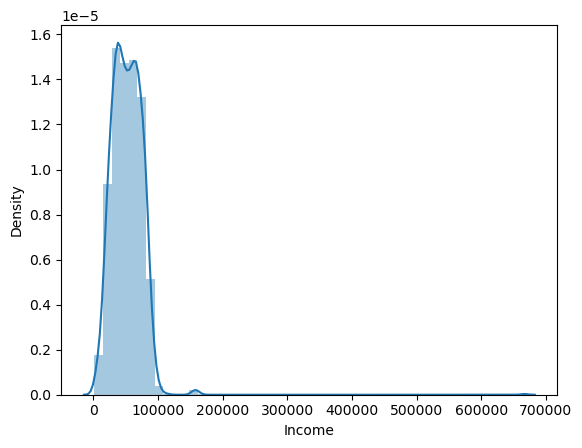

In [8]:
sns.distplot(df['Income']);

In [9]:
#printing % of missing values present at each columns
for i in df.isna().sum():
    print(f"Missing values are: {i/len(df)*100}")

Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 1.0714285714285714
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0


In [10]:
#only 1% missing value so we drop na values
df = df.dropna()
print("The total number of data-points after removing the rows ehich having missing values are:", len(df))
print(df.shape)

The total number of data-points after removing the rows ehich having missing values are: 2216
(2216, 29)


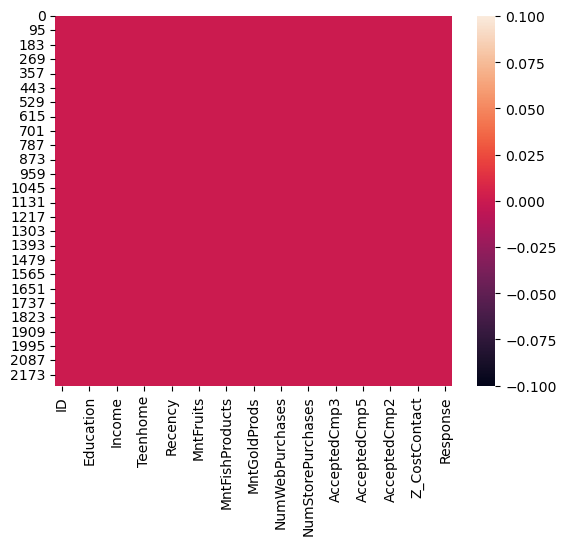

In [11]:
#After dropping missing values
sns.heatmap(df.isna());

# ***Duplicated Records***

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2216, dtype: bool

In [13]:
df.duplicated().sum()

0

In [14]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


We can notice that there is no duplicate values in the given dataset

In [15]:
#Finding the number of unique values present in each column
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In above cell 'Z_CostContact' and 'Z_Revenue' have same values in all the raws that's why they are not going to contribute anything in the model building so we can drop them

In [16]:
df = df.drop(columns=['Z_CostContact' , 'Z_Revenue'],axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


Converting the Year of Birth into Age

In [17]:
current_year = 2024

#Calculate the age based on the birth year and the current year
df['age'] = current_year - df['Year_Birth']

#Drop the original birth year column
df.drop(columns=['Year_Birth'],inplace=True)

#Save the modified dataset to a csv file
df.to_csv('Marketing_campaign_md.csv',index=False)
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,67
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,70
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,59
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,40
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,4,5,0,0,0,0,0,0,0,57
2236,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,5,7,0,0,0,1,0,0,0,78
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,13,6,0,1,0,0,0,0,0,43
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,10,3,0,0,0,0,0,0,0,68


Summary statistics

In [18]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,55.179603
std,3249.376275,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,2814.750000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
75%,8421.750000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000


# ***Now we will deal with categorical columns***


1.   Marital_Status

In [19]:
print("CATEGORICAL FEATURE IN Marital_Status column :" ,df["Marital_Status"].unique(),"\n")
print("TOTAL CATEGORICAL FEATURE IN Marital_Status column :", df["Marital_Status"].nunique(),"\n")

#values counts of each_feature
print("Total categories in the feature Marital_Status:","\n", df["Marital_Status"].value_counts(), "\n")


CATEGORICAL FEATURE IN Marital_Status column : ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'] 

TOTAL CATEGORICAL FEATURE IN Marital_Status column : 8 

Total categories in the feature Marital_Status: 
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 




2.   Education



In [20]:
print("CATEGORICAL FEATURE IN Education column :" ,df["Education"].unique(),"\n")
print("TOTAL CATEGORICAL FEATURE IN Marital_Status column :", df["Education"].nunique(),"\n")

#values counts of each_feature
print("Total categories in the feature Marital_Status:","\n", df["Education"].value_counts(), "\n")


CATEGORICAL FEATURE IN Education column : ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle'] 

TOTAL CATEGORICAL FEATURE IN Marital_Status column : 5 

Total categories in the feature Marital_Status: 
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 



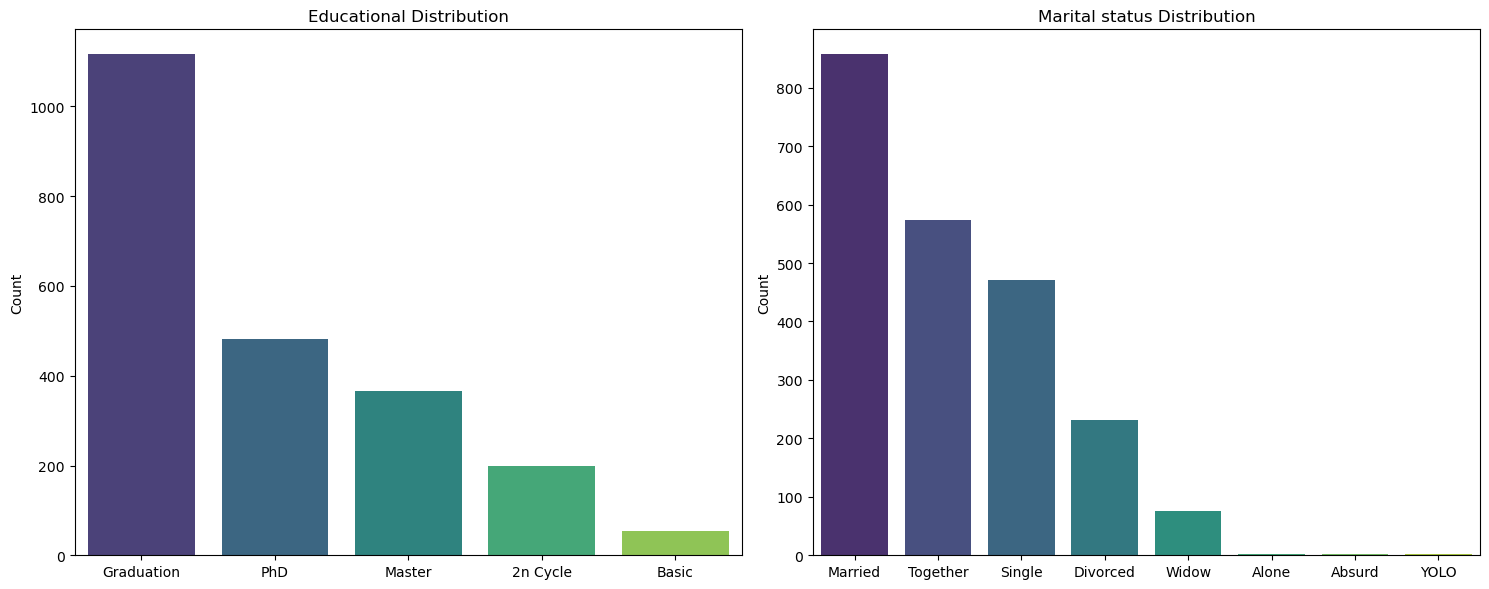

In [21]:
#Visuallization of distribution of categorical variables
#Set up the Figure and axes
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

#Plot Education Distribution
sns.barplot(x=df["Education"].value_counts().index,y=df["Education"].value_counts().values,ax=axes[0],palette='viridis')
axes[0].set_title('Educational Distribution')
axes[0].set_ylabel('Count')

#Plot Marital status Distribution
sns.barplot(x=df["Marital_Status"].value_counts().index,y=df["Marital_Status"].value_counts().values,ax=axes[1],palette='viridis')
axes[1].set_title('Marital status Distribution')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

# ***Feature Engineering***

In [22]:
#Deriving living situation by marital status"Alone"
#we will 5 values in to 2 unique values which is alone and or having partner
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Segmenting education levels in three groups
#we will convert different categories in Undergraduate, Graduate Postgraduate
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Droping the original Marital status column
df.drop(columns = ["Marital_Status"],inplace = True)
df

,ID,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Living_With
0,5524,Graduate,58138.0,0,0,2012-09-04,58,635,88,546,...,7,0,0,0,0,0,0,1,67,Alone
1,2174,Graduate,46344.0,1,1,2014-03-08,38,11,1,6,...,5,0,0,0,0,0,0,0,70,Alone
2,4141,Graduate,71613.0,0,0,2013-08-21,26,426,49,127,...,4,0,0,0,0,0,0,0,59,Partner
3,6182,Graduate,26646.0,1,0,2014-02-10,26,11,4,20,...,6,0,0,0,0,0,0,0,40,Partner
4,5324,Postgraduate,58293.0,1,0,2014-01-19,94,173,43,118,...,5,0,0,0,0,0,0,0,43,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduate,61223.0,0,1,2013-06-13,46,709,43,182,...,5,0,0,0,0,0,0,0,57,Partner
2236,4001,Postgraduate,64014.0,2,1,2014-06-10,56,406,0,30,...,7,0,0,0,1,0,0,0,78,Partner
2237,7270,Graduate,56981.0,0,0,2014-01-25,91,908,48,217,...,6,0,1,0,0,0,0,0,43,Alone
2238,8235,Postgraduate,69245.0,0,1,2014-01-24,8,428,30,214,...,3,0,0,0,0,0,0,0,68,Partner


Encoding the categorical column using LebelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder as le

#Apply Lebel Encoding to 'Living_With' And 'Education'
df['Living_With'] = le().fit_transform(df['Living_With'])
df['Education'] = le().fit_transform(df['Education'])

#Save the Encoded data to a csv file
df.to_csv('Marketing_campaign_ed.csv',index=False)
df

,ID,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Living_With
0,5524,0,58138.0,0,0,2012-09-04,58,635,88,546,...,7,0,0,0,0,0,0,1,67,0
1,2174,0,46344.0,1,1,2014-03-08,38,11,1,6,...,5,0,0,0,0,0,0,0,70,0
2,4141,0,71613.0,0,0,2013-08-21,26,426,49,127,...,4,0,0,0,0,0,0,0,59,1
3,6182,0,26646.0,1,0,2014-02-10,26,11,4,20,...,6,0,0,0,0,0,0,0,40,1
4,5324,1,58293.0,1,0,2014-01-19,94,173,43,118,...,5,0,0,0,0,0,0,0,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,0,61223.0,0,1,2013-06-13,46,709,43,182,...,5,0,0,0,0,0,0,0,57,1
2236,4001,1,64014.0,2,1,2014-06-10,56,406,0,30,...,7,0,0,0,1,0,0,0,78,1
2237,7270,0,56981.0,0,0,2014-01-25,91,908,48,217,...,6,0,1,0,0,0,0,0,43,0
2238,8235,1,69245.0,0,1,2014-01-24,8,428,30,214,...,3,0,0,0,0,0,0,0,68,1


Income Distribution

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


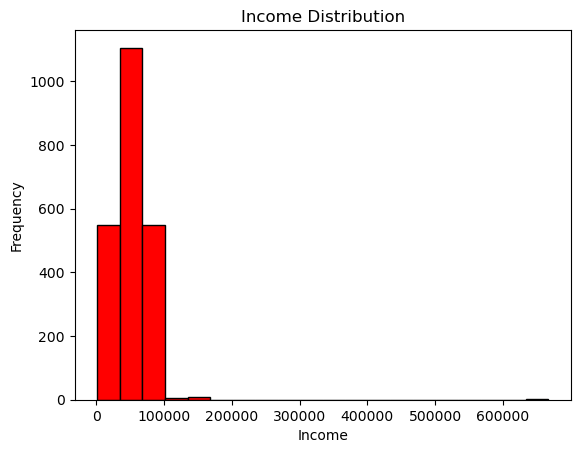

In [24]:
#Check the summary Statistics of the 'Income' column
print(df['Income'].describe())

#create a histogram to visualize to disrtibution of 'Income'
plt.hist(df['Income'],bins=20,color='red',edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()

* There's a significant difference between the maximum value and the majority of the data, which causing the histogram to be skewed and not fullu display the distribution
* there is outlier present in the data we'll deal with it in follow part

Correlation analysis

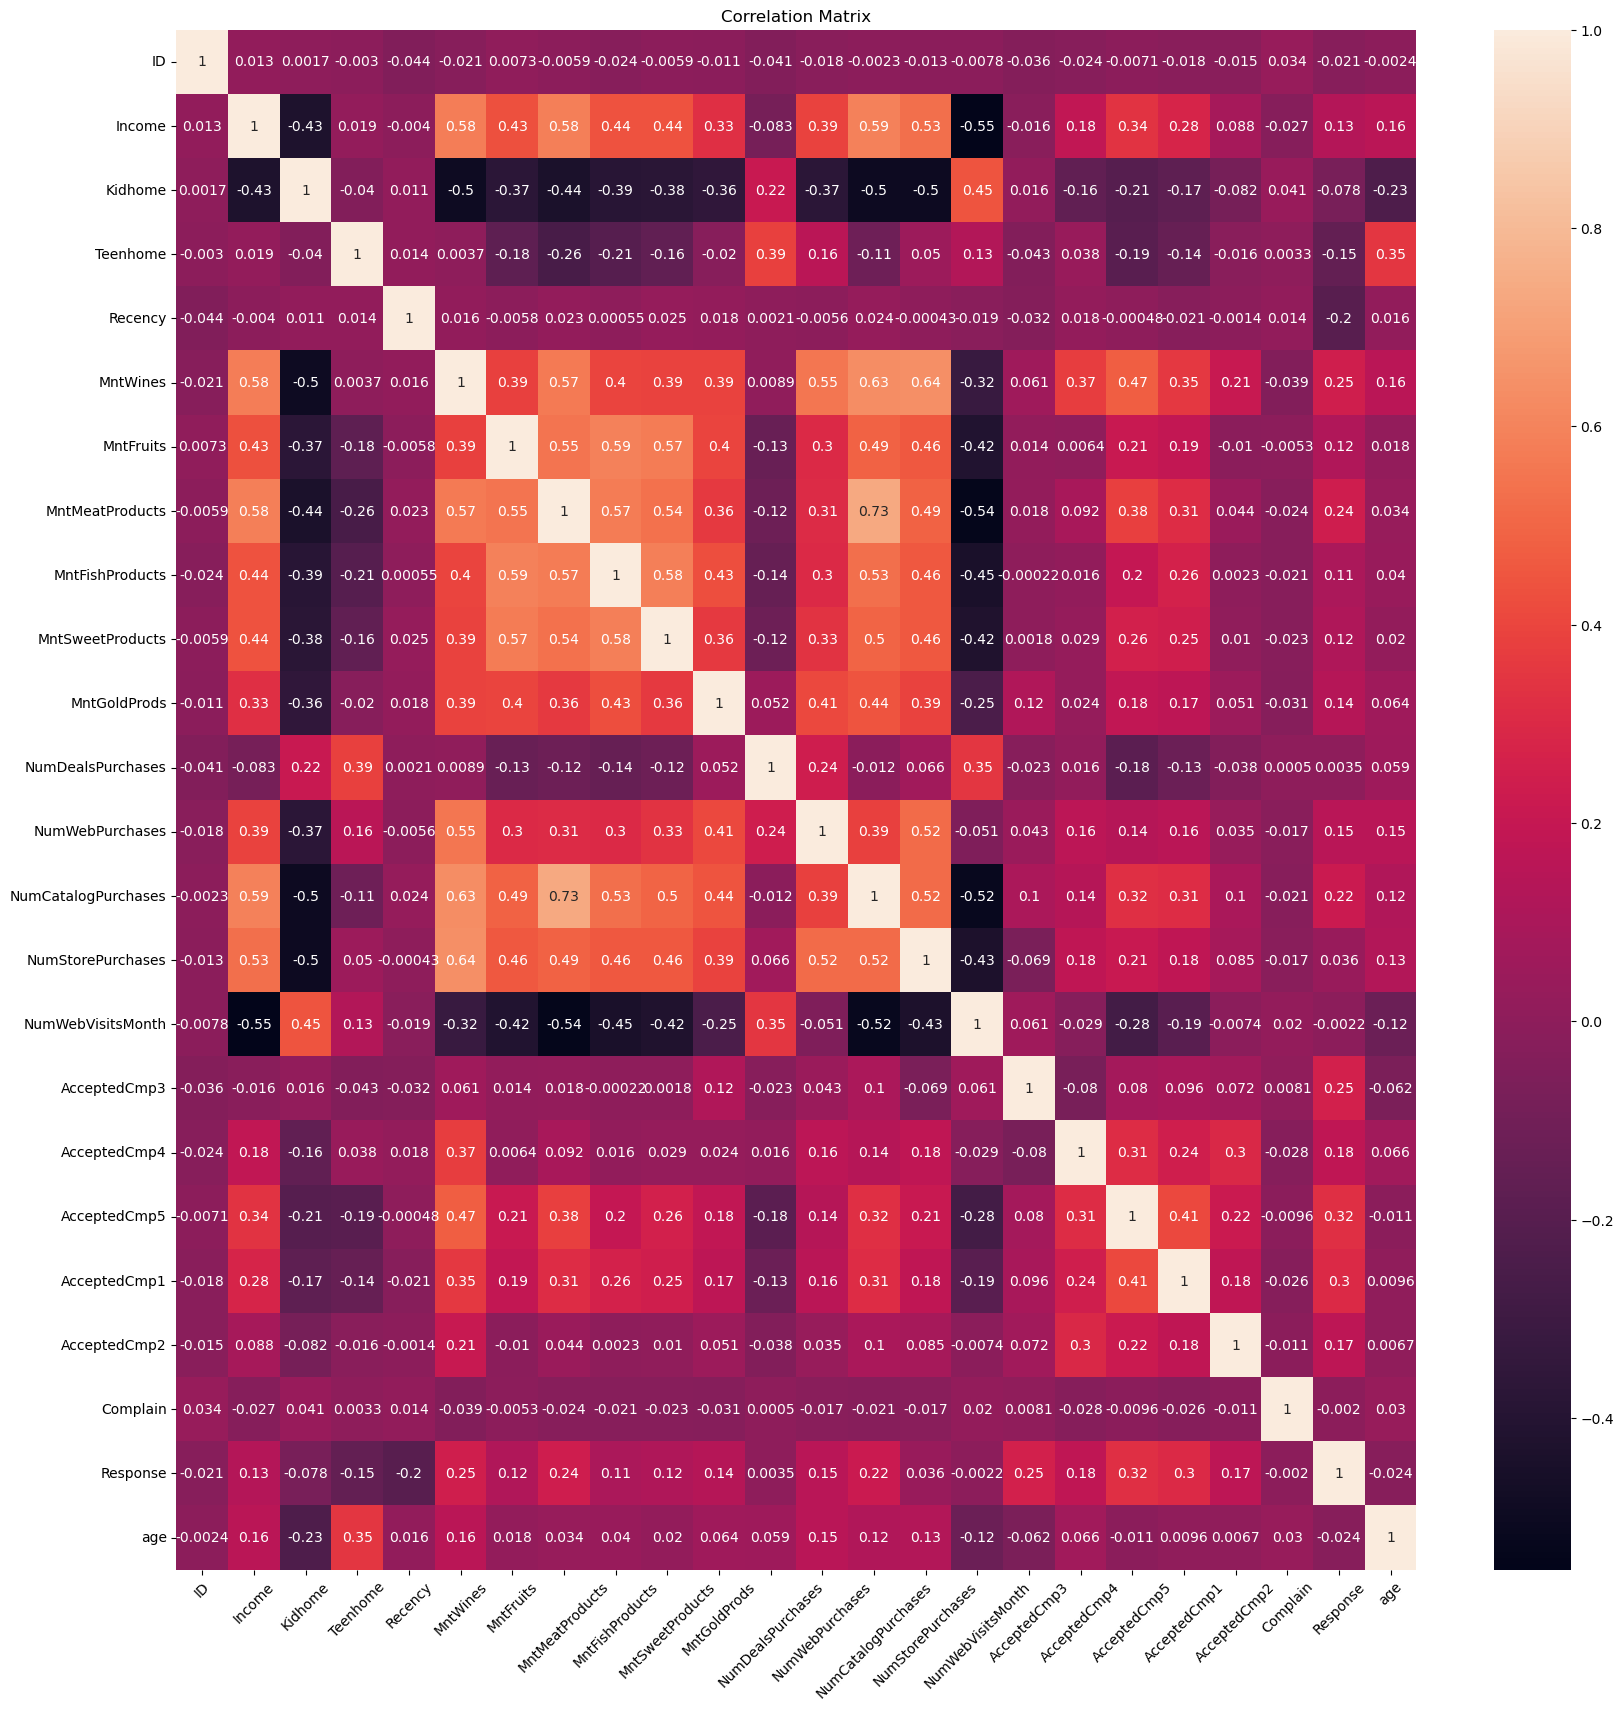

In [25]:
#Identify numeric columns for correlation analysis\
numaric_columns = df.select_dtypes(include=['int64','float64']).columns

#Calculate correlation matrix
correlaion_matrix = df[numaric_columns].corr()

#Visualize correlation matrix using a heatmap
#Adjust figure sixe and rotation of trick label
plt.figure(figsize=(20,20))
sns.heatmap(correlaion_matrix,annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

# **Observations**
1. The amount spend on various product categories (MntWines, MntFruits, MntMeatProducts, MntFishProduct,MntSweetProducts, MntGoldProds) is positively correlated with each other, with the strongest correlation observed between MntWines and MntMeatProducts (0.58)
2. NumDealsPurchases has weak positive correlation with NumStorePurchases (0.22) and NumCatalogPurchases (0.33). suggesting that customers who engage in deal purchases may also make purchases from physical stores and catelogs
3. Highest correlation observed in the MntMeatProduct and NumCatelogPurchases which is around (0.72).
4. Exploring the relationship between age group and marketing respones could provide valuable insights into the target audience for successful campaigns
5. Exploring how family size correlates with spending behavior could provide insights into the preferences and needs of different family types.

Visualization for familys

In [26]:
#Count occurrences of different values in 'Kidhome'
kidhome_counts = df['Kidhome'].value_counts()

#Count occurrences of different values in 'Teenhome'
Teenhome_counts = df['Teenhome'].value_counts()

#Display the Counts
print('Kidhome count:\n',kidhome_counts,'\n')
print('Teenhome count:\n',Teenhome_counts,'\n')


Kidhome count:
 0    1283
1     887
2      46
Name: Kidhome, dtype: int64 

Teenhome count:
 0    1147
1    1018
2      51
Name: Teenhome, dtype: int64 



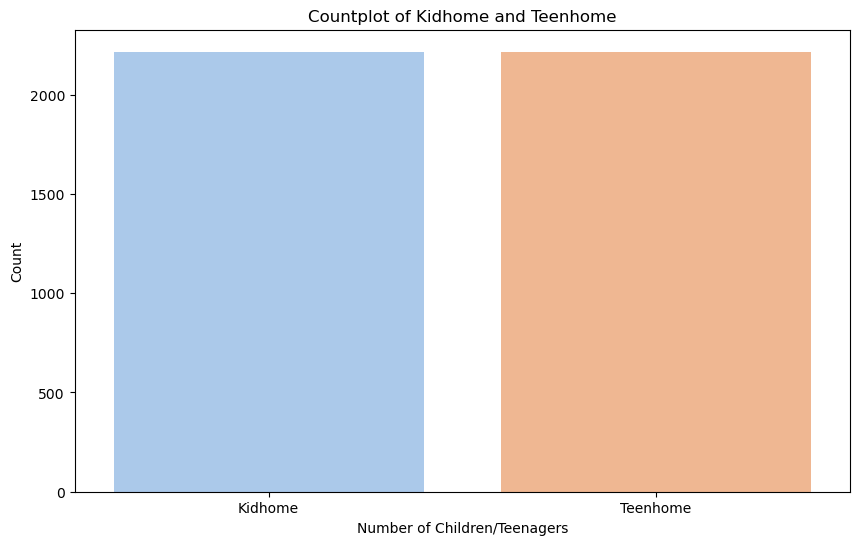

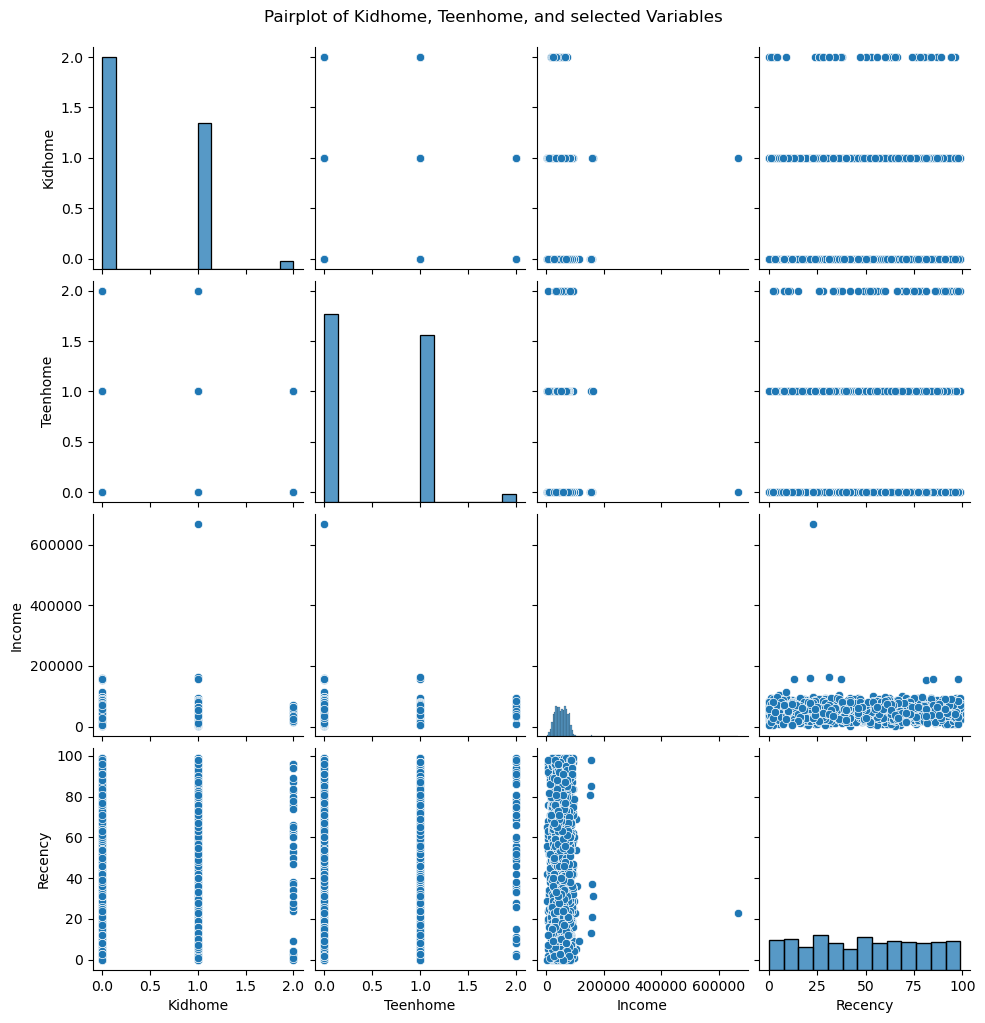

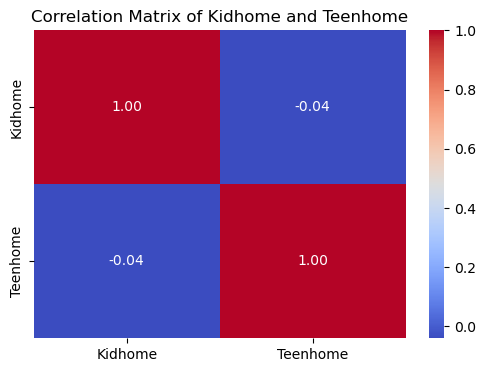

In [27]:
family_columns = ['Kidhome','Teenhome']

#countplot to visualize the distribution of kidhome and Teenhome
plt.figure(figsize=(10,6))
sns.countplot(data=df[family_columns],palette='pastel')
plt.title ('Countplot of Kidhome and Teenhome')
plt.xlabel('Number of Children/Teenagers')
plt.ylabel('Count')
plt.show()

#Pairplot to explore Relationships between Kidhome, Teenhome, and other variables
sns.pairplot(df, vars=['Kidhome', 'Teenhome', 'Income', 'Recency'])
plt.suptitle('Pairplot of Kidhome, Teenhome, and selected Variables', y=1.02)
plt.show()

#Correlation matrix to quantify relationships
correlation_matrix_family = df[family_columns].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_family, annot=True, cmap="coolwarm", fmt="1.2f")
plt.title('Correlation Matrix of Kidhome and Teenhome')
plt.show()

# ***Feature Engineering for dt_customer***

 We will  going to create a feature out of "Dt_Customer" that indicates the number of years a customer is registered in the database.


In [28]:
import datetime
#Created a feature "Customer_For"
def get_different_year():
    registration_year = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)
    current_year = datetime.datetime.now().year
    return current_year - registration_year

df['Years_Since_Registration'] = get_different_year()  # Number of years since customer registration
df["Years_Since_Registration"] = pd.to_numeric(df["Years_Since_Registration"], errors="coerce")
df["Years_Since_Registration"]

#Droping the original Marital status column
df.drop(columns = ["Dt_Customer"],inplace = True)
df

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Living_With,Years_Since_Registration
0,5524,0,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,67,0,12
1,2174,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,70,0,10
2,4141,0,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,59,1,11
3,6182,0,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,40,1,10
4,5324,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,43,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,0,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,0,0,57,1,11
2236,4001,1,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,0,78,1,10
2237,7270,0,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,0,43,0,10
2238,8235,1,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,0,68,1,10


Visualization for Recency

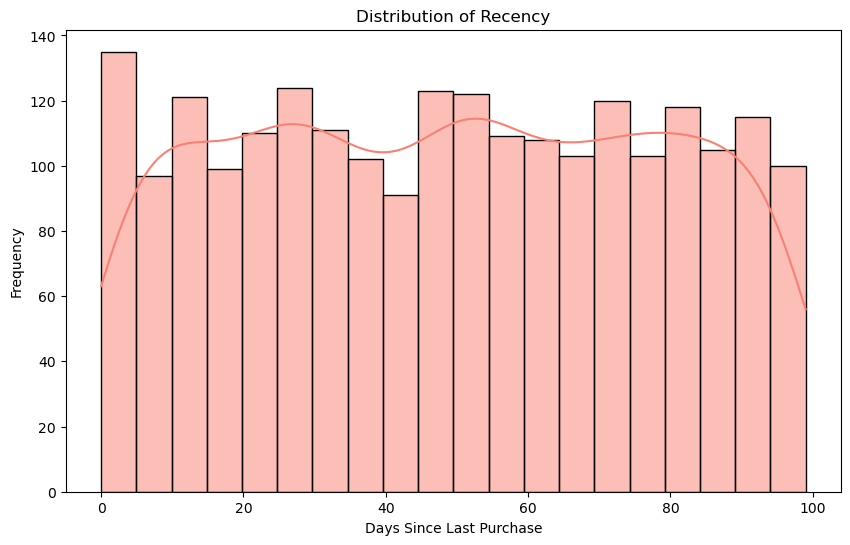

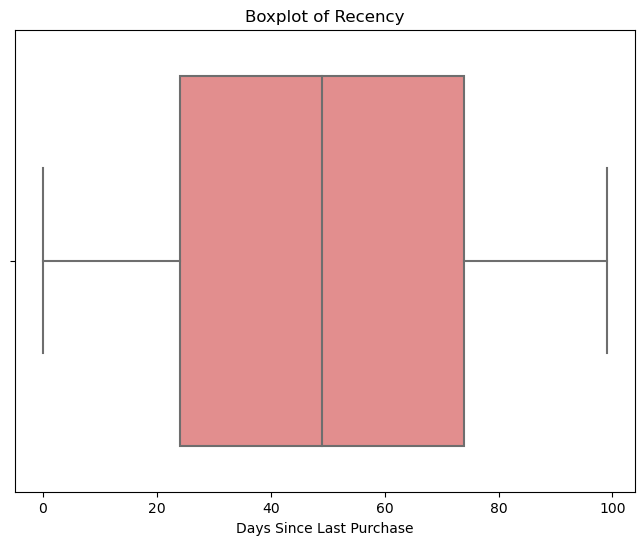

count    2216.000000
mean       49.012635
std        28.948352
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


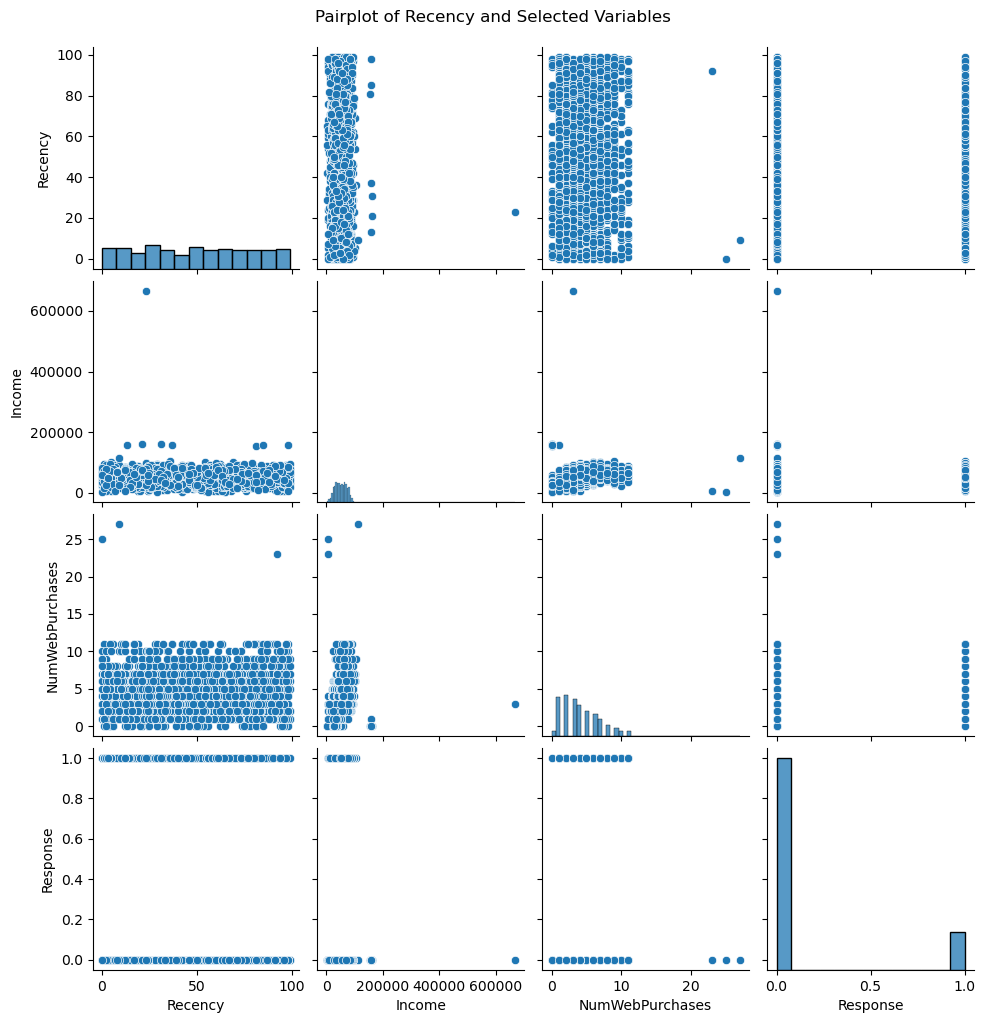

In [29]:
#Histogram to visualize the distribution of recency
plt.figure(figsize=(10, 6))
sns.histplot(df['Recency'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Recency')
plt.xlabel('Days Since Last Purchase')
plt.ylabel("Frequency")
plt.show()

#Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Recency'], color='lightcoral')
plt.title('Boxplot of Recency')
plt.xlabel('Days Since Last Purchase')
plt.show()

#Summary statistics for recency
recency_summary = df['Recency'].describe()
print(recency_summary)

#Pairplot to explore relationships with other variables
sns.pairplot(df, vars=["Recency", "Income", "NumWebPurchases", 'Response'])
plt.suptitle('Pairplot of Recency and Selected Variables', y=1.02)
plt.show()


Purchase behavior analysis

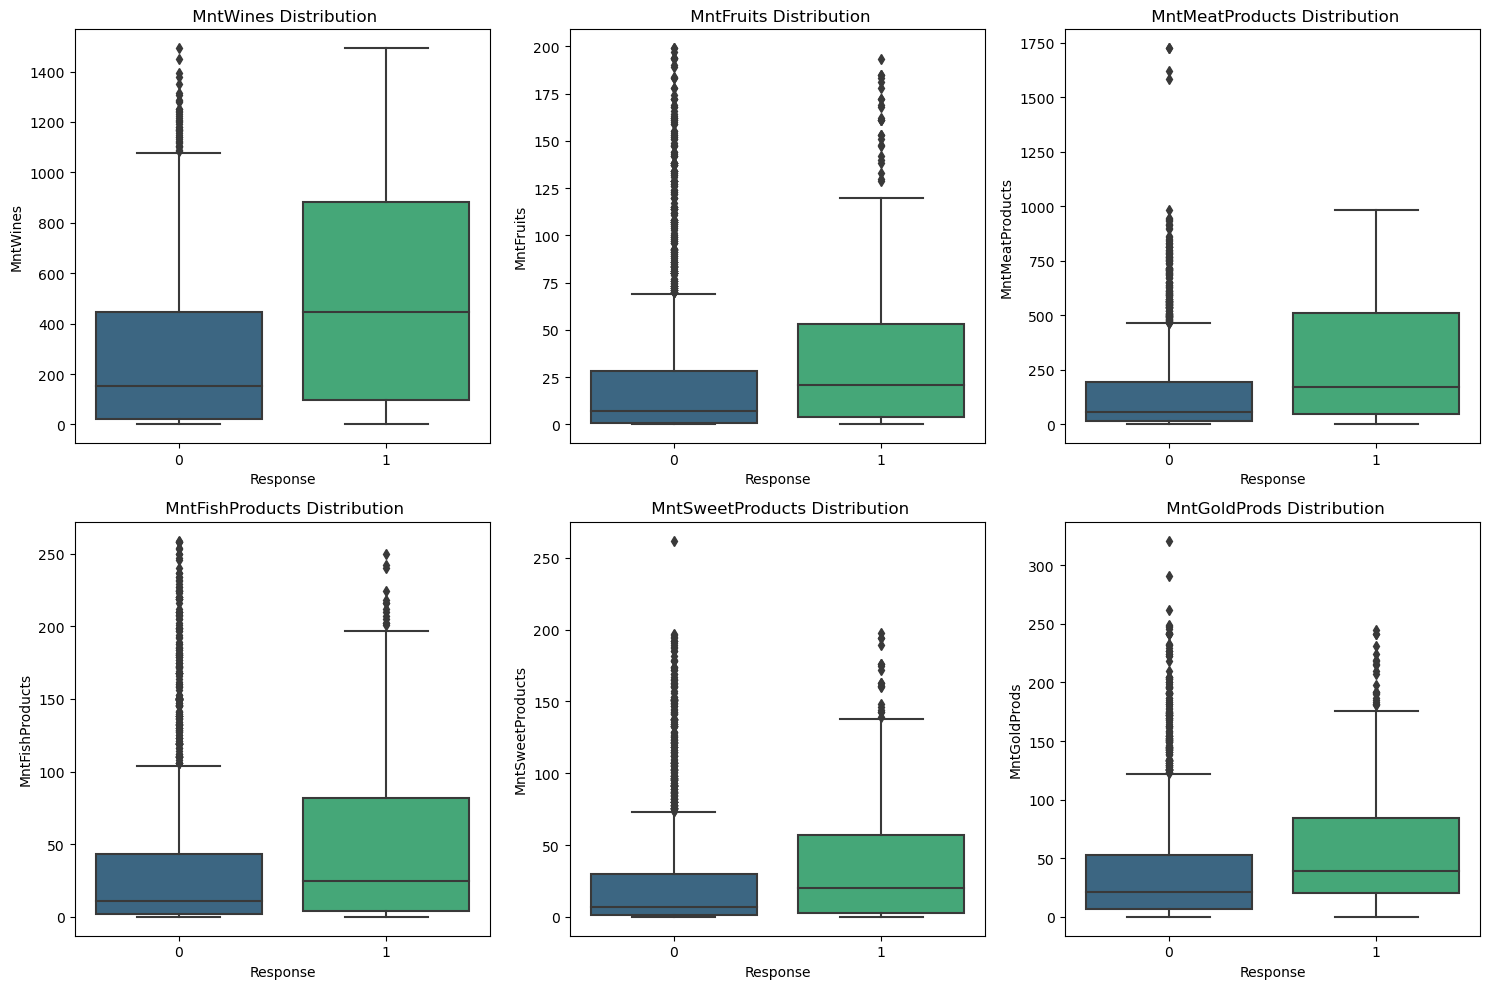

In [30]:
#Selecting columns for purchase behavior analysis
purchase_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

#Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

#Plot box plots for each spending category
for col, ax in zip(purchase_columns, axes.flatten()):
    sns.boxplot(x="Response", y=col, data=df, ax=ax, palette='viridis')
    ax.set_title(f' {col} Distribution')

plt.tight_layout()
plt.show()


Purchases analysis

In [31]:
#Select 'NumPurchases' Column
num_purchases_columns = ['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Display unique values for each NumPurchases column
for column in num_purchases_columns:
    unique_values = df[column].unique()
    print(f"unique values for {column}:", unique_values)
    print()


unique values for NumDealsPurchases: [ 3  2  1  5  4 15  7  6  9  0  8 10 13 11 12]

unique values for NumWebPurchases: [ 8  1  2  5  6  7  4  3 11  0 10  9 23 27 25]

unique values for NumCatalogPurchases: [10  1  2  0  3  4  6 28  9  5  8  7 11 22]

unique values for NumStorePurchases: [ 4  2 10  6  7  0  3  8  5 12  9 13 11  1]



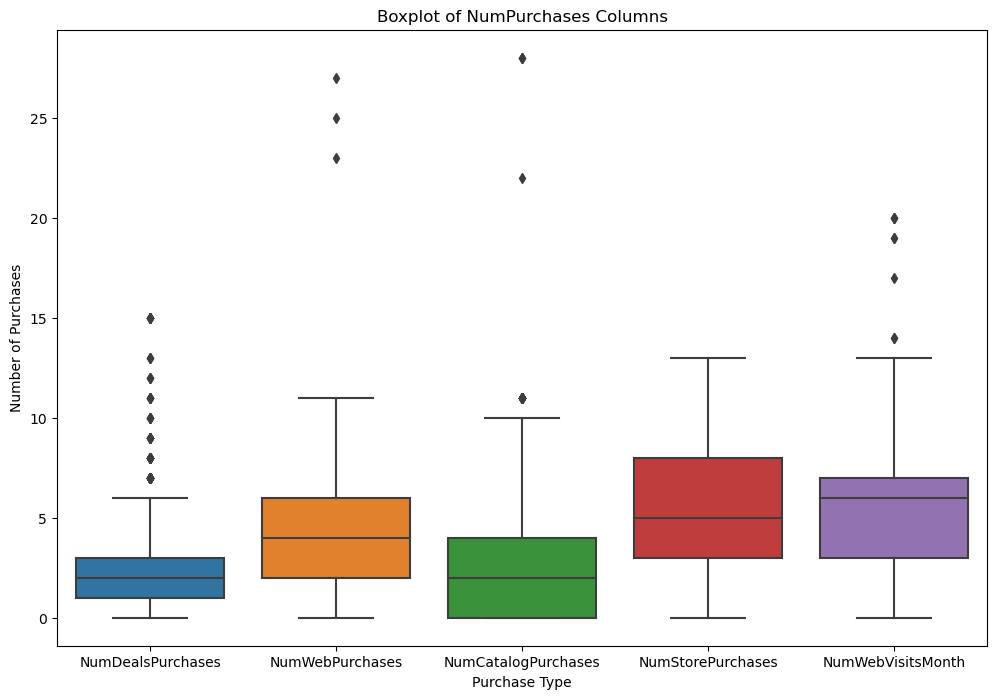

In [32]:
#Select NumPurchases columns
num_purchases_columns = ['NumDealsPurchases', 'NumWebPurchases', "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

#Boxplot to visual ize the distribution
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_purchases_columns])
plt.title('Boxplot of NumPurchases Columns')
plt.xlabel('Purchase Type')
plt.ylabel('Number of Purchases')
plt.show()


Customer Acceptance rates for marketing campaign

In [33]:
#Calculate acceptance rates for marketing campaigns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptance_rates = df[campaign_columns].mean()

print("Acceptance Rates for Marketing Campaigns:")
print(acceptance_rates)


Acceptance Rates for Marketing Campaigns:
AcceptedCmp1    0.064079
AcceptedCmp2    0.013538
AcceptedCmp3    0.073556
AcceptedCmp4    0.074007
AcceptedCmp5    0.073105
dtype: float64


In [34]:
#Calculate acceptance rates for marketing campaigns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
acceptance_rates = df[campaign_columns].mean()*100

#Print acceptance rates as percentages
print("Acceptance Rates for Marketing Campaigns:")
for campaign, rate in acceptance_rates.items():
    print(f"{campaign}: {rate:.2f}%")


Acceptance Rates for Marketing Campaigns:
AcceptedCmp1: 6.41%
AcceptedCmp2: 1.35%
AcceptedCmp3: 7.36%
AcceptedCmp4: 7.40%
AcceptedCmp5: 7.31%


In [35]:
accepted_cmp_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

#Count the occurrences of e and 1 in each "Acceptedcmp column"
for column in accepted_cmp_columns:
    counts = df[column].value_counts()
    print(f"Counts for {column}:\n{counts}\n")

Counts for AcceptedCmp1:
0    2074
1     142
Name: AcceptedCmp1, dtype: int64

Counts for AcceptedCmp2:
0    2186
1      30
Name: AcceptedCmp2, dtype: int64

Counts for AcceptedCmp3:
0    2053
1     163
Name: AcceptedCmp3, dtype: int64

Counts for AcceptedCmp4:
0    2052
1     164
Name: AcceptedCmp4, dtype: int64

Counts for AcceptedCmp5:
0    2054
1     162
Name: AcceptedCmp5, dtype: int64



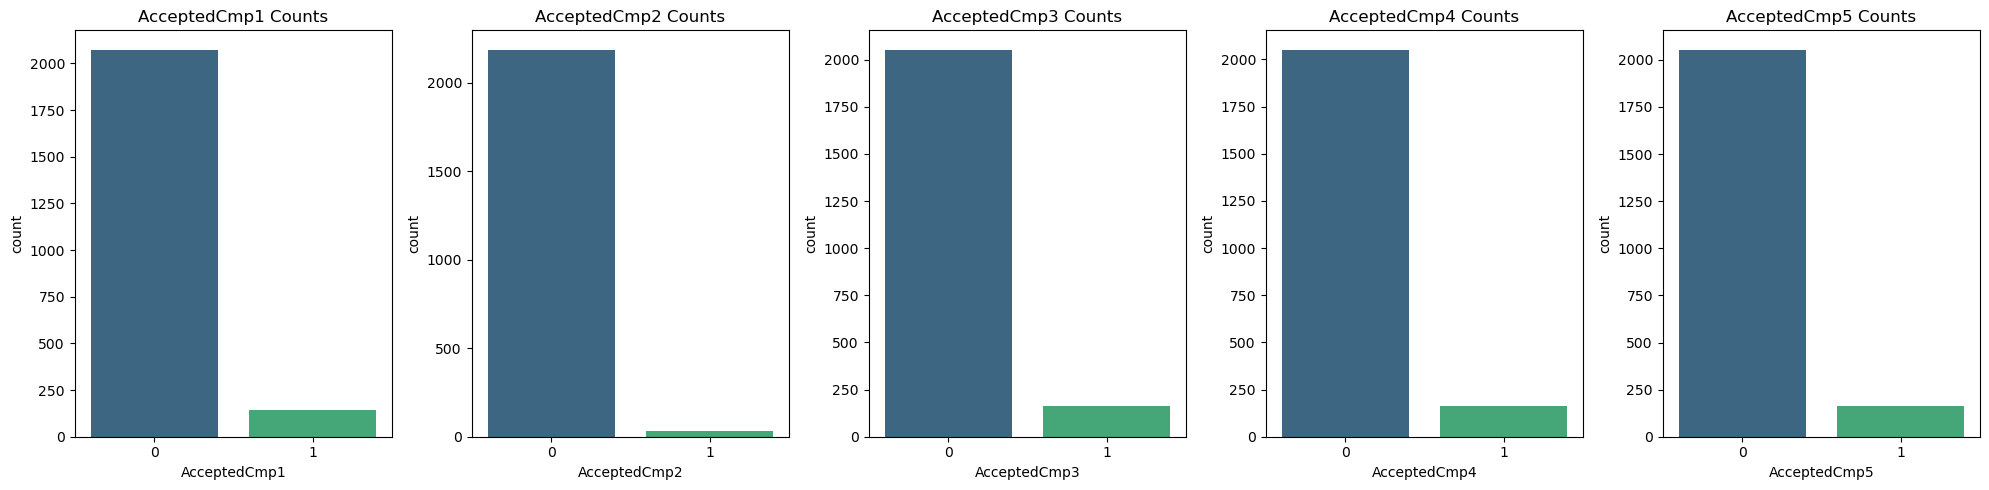

In [36]:
#Selecting relevant columns for campaign acceptance analysis
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

#Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

#Plot bar plots for each campaign
for col, ax in zip(campaign_columns, axes.flatten()):
    sns.countplot(x=col, data=df, ax=ax, palette='viridis')
    ax.set_title(f'{col} Counts')

plt.tight_layout ()
plt.show()


1. AcceptedCmp1:

Not accepted: 2096 customers.

Accepted: 144 customers

Acceptance Rate: Approximately 6.43%

2. AcceptedCmp2:

Not accepted: 2210 customers

Accepted: 30 customers.

Acceptance Rate: Approximately 1.34%

3. AcceptedCmp3:

Not accepted: 2077 customers

Accepted: 163 customers

Acceptance Rate: Approximately 7.28%

4. AcceptedCmp4:

Not accepted: 2073 customers

Accepted: 167 customers

Acceptance Rate: Approximately 7.47%

5. AcceptedCmp5:

Not accepted: 2077 customers

Accepted: 163 customers.

Acceptance Rate: Approximately 7.28%

Visualisation for Complain

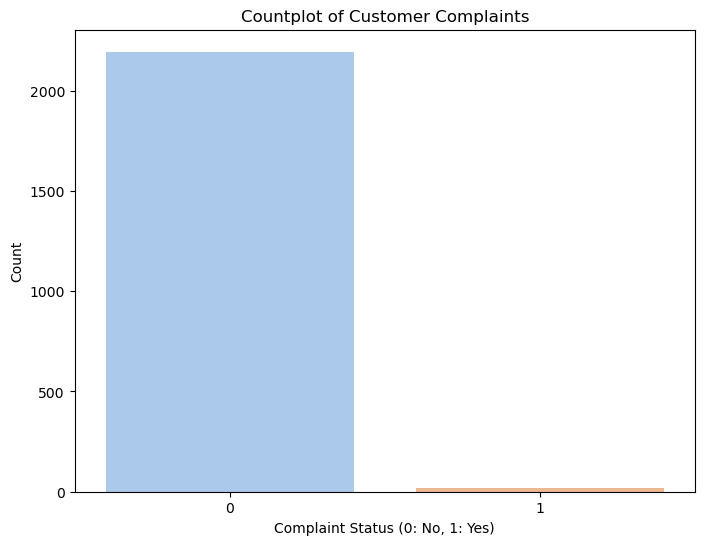

Percentage of customers with complaints: 0.95%


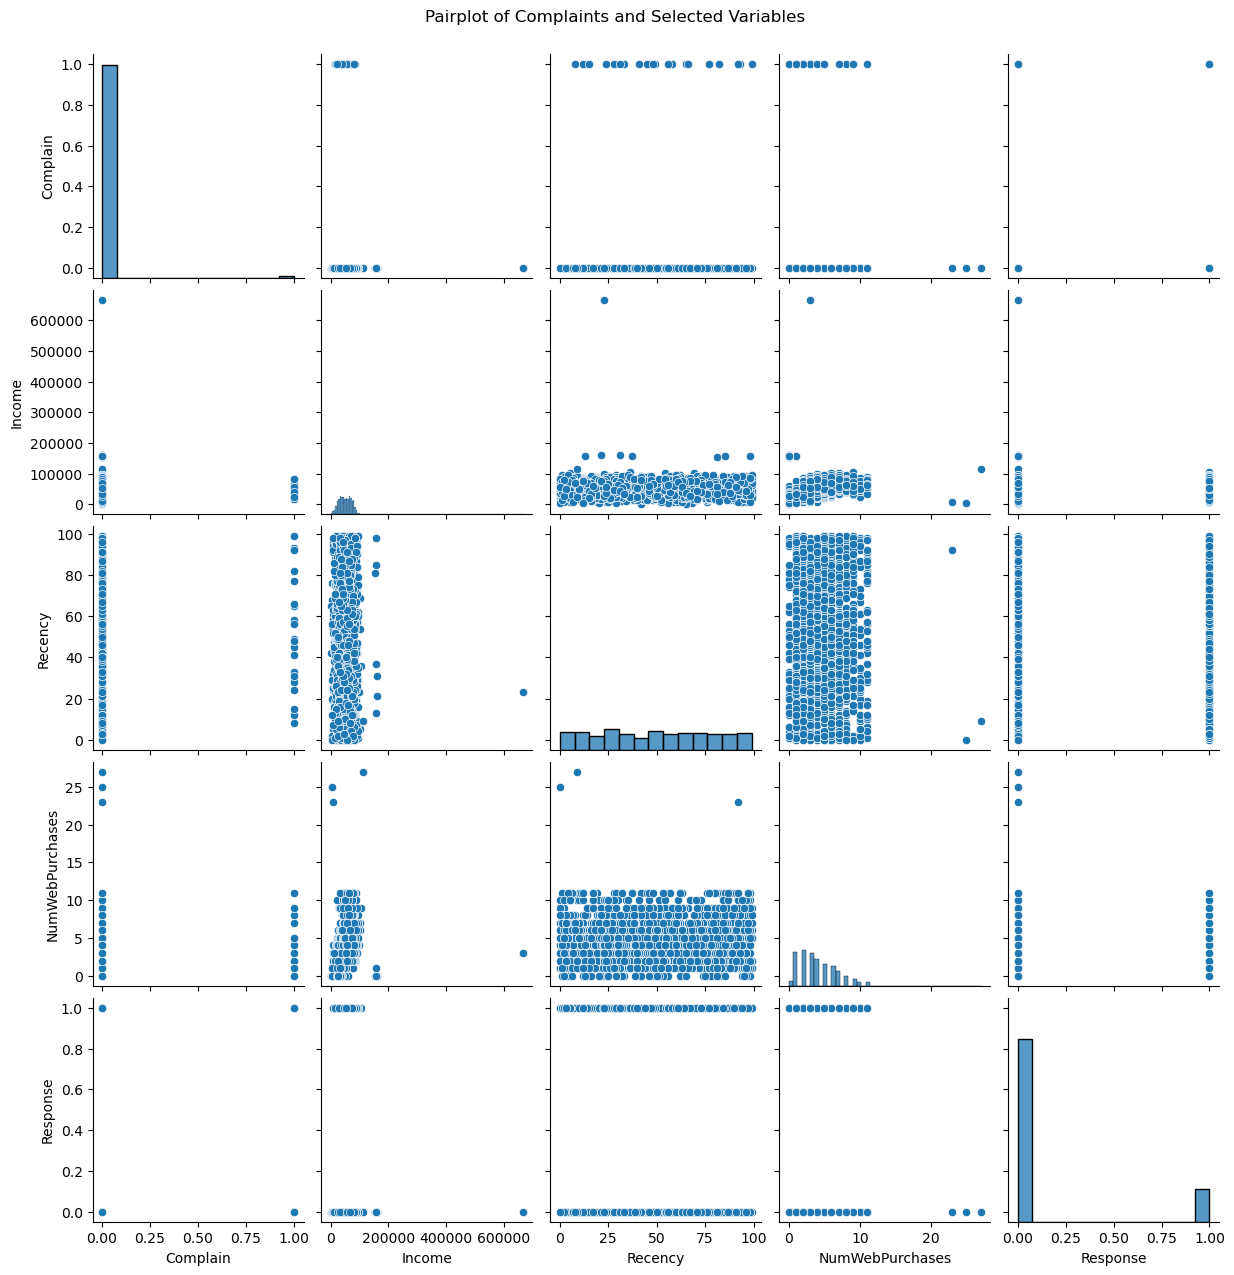

In [37]:
#Countplot to visualize the distribution of complaints
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Complain', palette='pastel')
plt.title('Countplot of Customer Complaints')
plt.xlabel('Complaint Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

#Percentage of customers with complaints
complaint_percentage = df['Complain'].mean() * 100
print(f"Percentage of customers with complaints: {complaint_percentage:.2f}%")

#Pairplot to explore relationships with other variables
sns.pairplot(df, vars=['Complain', 'Income', 'Recency', 'NumWebPurchases', 'Response'])
plt.suptitle('Pairplot of Complaints and Selected Variables', y=1.02)
plt.show()


Response Analysis

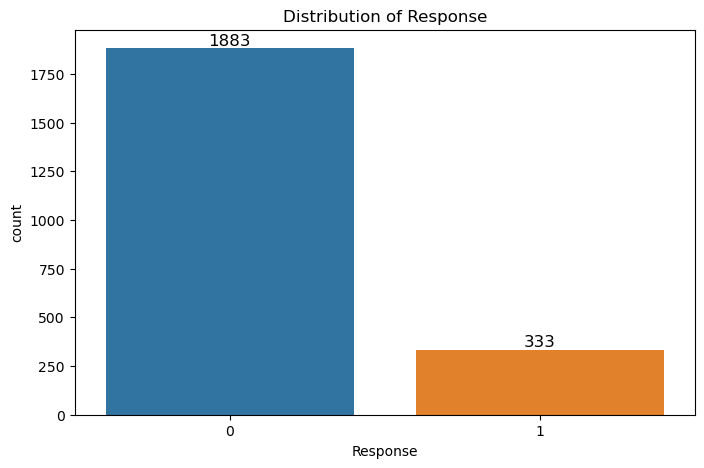

In [38]:
#Count plot for Response variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Response', data=df)

#Display count values inside the bars
for count, p in zip(df['Response'].value_counts(), plt.gca().patches):
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), count, ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribution of Response')
plt.show()


Visualization of age

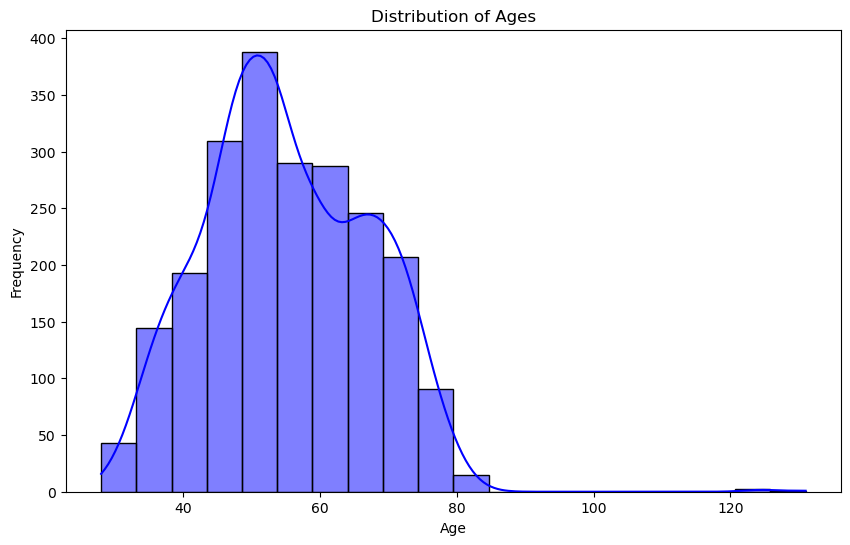

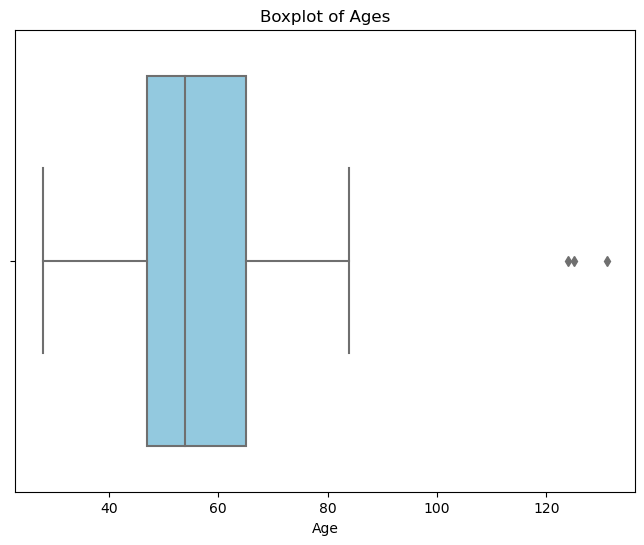

count    2216.000000
mean       55.179603
std        11.985554
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: age, dtype: float64


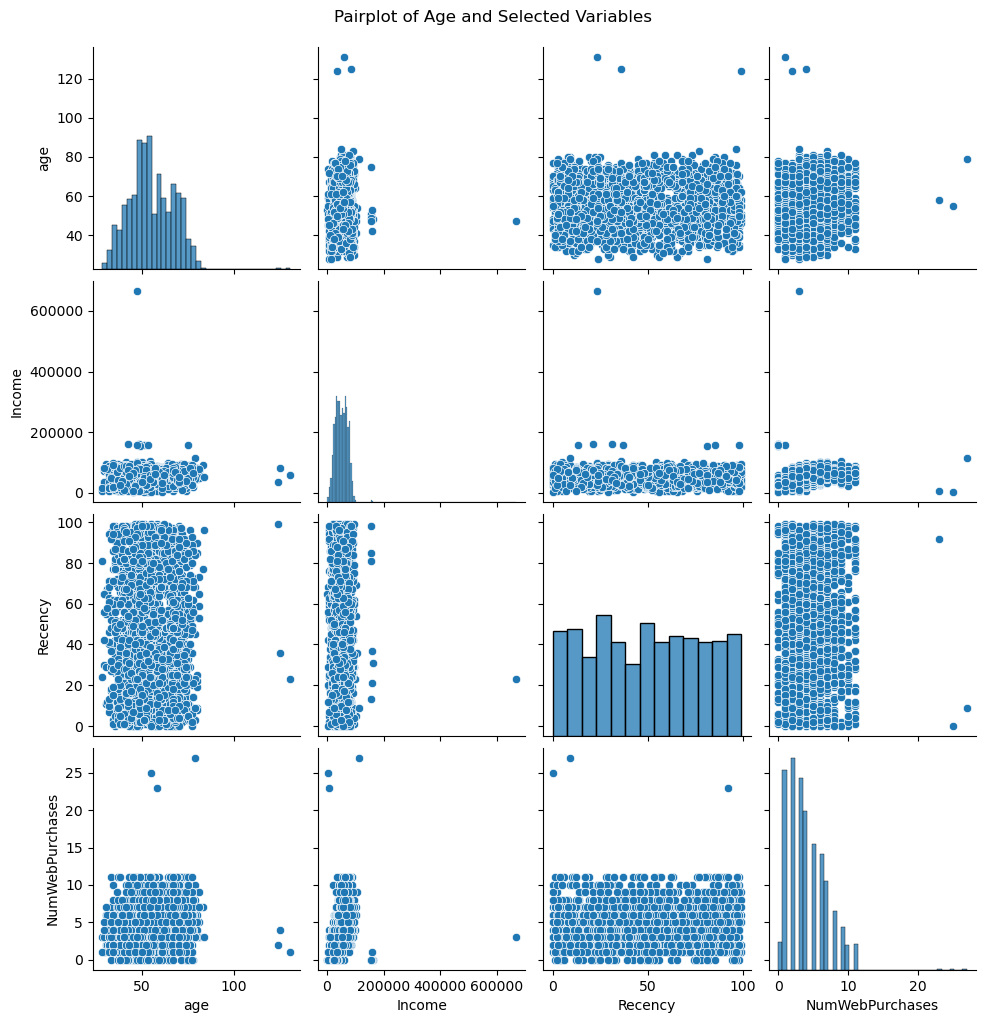

In [39]:
#Histogram to visualize the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Boxplot of Ages')
plt.xlabel('Age')
plt.show()

#Summary statistics for age
age_summary= df['age'].describe()
print(age_summary)

#Pairplot to explore relationships with other variables
sns.pairplot(df, vars=['age', 'Income', 'Recency', 'NumWebPurchases'])
plt.suptitle('Pairplot of Age and Selected Variables',y=1.02)
plt.show()


# ***Outlier Detection***



In [40]:
columns_to_remove_outliers = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','MntWines', 'MntFruits',
                              'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds', 'age', 'Income']

# Copy the original DataFrame to avoid modifying the original
df_no_outliers = df.copy()

#Loop through selected columns and remove outliers using IQR method
for column in columns_to_remove_outliers:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

#Print the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", df_no_outliers.shape)


Shape of DataFrame after removing outliers: (1191, 27)


In [41]:
from scipy.stats import zscore

#Select columns for outlier removal excluding 'Age"
columns_to_remove_outliers = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits',
                              'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','age','Income']

#Calculate z-scores for selected columns
z_scores = zscore(df[columns_to_remove_outliers])

# Define a threshold for z-scores (e.g., 3 or -3, based on your preference)
z_score_threshold = 3

#Remove rows with outliers based on z-scores
df_no_outliers = df[(abs(z_scores) < z_score_threshold).all(axis=1)]

#Print the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", df_no_outliers.shape)
df1=df_no_outliers
df1


Shape of DataFrame after removing outliers: (1958, 27)


,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Living_With,Years_Since_Registration
0,5524,0,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,67,0,12
1,2174,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,70,0,10
2,4141,0,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,59,1,11
3,6182,0,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,40,1,10
4,5324,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,43,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,0,34421.0,1,0,81,3,3,7,6,...,0,0,0,0,0,0,0,50,1,11
2236,4001,1,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,0,78,1,10
2237,7270,0,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,0,43,0,10
2238,8235,1,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,0,68,1,10


# **EDA using dataprep.eda**

In [55]:
from dataprep.eda import create_report
data = pd.read_excel("D:\marketing_campaign.xlsx")
create_report(data)

ModuleNotFoundError: No module named 'dataprep'


# ***Feature Engineering***

In [43]:
#customer Total Spending on products
df1["Customer_Spent"] = df1["MntWines"] + df1["MntFruits"] + df1["MntMeatProducts"] + df1["MntFishProducts"] + df1["MntSweetProducts"] + df1["MntGoldProds"]

#Customer Total Purchases
df1["Total_purcheses"] = df1["NumDealsPurchases"] + df1["NumWebPurchases"] + df1["NumCatalogPurchases"] + df1["NumStorePurchases"]

#Number of Children
df1["Num_Children"] = df1["Kidhome"] + df1["Teenhome"]

#Accenpted Campaigns Total
df1["Total_Accept_cmp"] = df1["AcceptedCmp1"] + df1["AcceptedCmp2"] + df1["AcceptedCmp3"] + df1["AcceptedCmp4"] + df1["AcceptedCmp5"]
df1


,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp
0,5524,0,58138.0,0,0,58,635,88,546,172,...,0,0,1,67,0,12,1617,25,0,0
1,2174,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,70,0,10,27,6,2,0
2,4141,0,71613.0,0,0,26,426,49,127,111,...,0,0,0,59,1,11,776,21,0,0
3,6182,0,26646.0,1,0,26,11,4,20,10,...,0,0,0,40,1,10,53,8,1,0
4,5324,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,43,1,10,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,0,34421.0,1,0,81,3,3,7,6,...,0,0,0,50,1,11,30,4,1,0
2236,4001,1,64014.0,2,1,56,406,0,30,0,...,0,0,0,78,1,10,444,22,3,1
2237,7270,0,56981.0,0,0,91,908,48,217,32,...,0,0,0,43,0,10,1241,19,0,1
2238,8235,1,69245.0,0,1,8,428,30,214,80,...,0,0,0,68,1,10,843,23,1,0


In [44]:
#Droping the original Marital status column
df1 = df1.drop(columns=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases",
                        "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Kidhome","Teenhome","AcceptedCmp1","AcceptedCmp2",
                        "AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"],axis=1)
df1

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp
0,5524,0,58138.0,58,7,0,1,67,0,12,1617,25,0,0
1,2174,0,46344.0,38,5,0,0,70,0,10,27,6,2,0
2,4141,0,71613.0,26,4,0,0,59,1,11,776,21,0,0
3,6182,0,26646.0,26,6,0,0,40,1,10,53,8,1,0
4,5324,1,58293.0,94,5,0,0,43,1,10,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,0,34421.0,81,7,0,0,50,1,11,30,4,1,0
2236,4001,1,64014.0,56,7,0,0,78,1,10,444,22,3,1
2237,7270,0,56981.0,91,6,0,0,43,0,10,1241,19,0,1
2238,8235,1,69245.0,8,3,0,0,68,1,10,843,23,1,0


# Dimensionality Reduction using PCA

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'yellowbrick'

In [46]:
df2=df1


In [47]:
#Scaling
scaler = StandardScaler()
scaler.fit(df2)
scaled_df2 = pd.DataFrame(scaler.transform(df2),columns= df2.columns )
print("All features are now scaled")

All features are now scaled


In [48]:
scaled_df2

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp
0,-0.023233,-0.915935,0.460740,0.305617,0.649124,-0.101587,2.549885,1.030059,-1.364761,1.529466,2.054732,1.464614,-1.384884,-0.414517
1,-1.055082,-0.915935,-0.138591,-0.384856,-0.234732,-0.101587,-0.392174,1.288254,-1.364761,-1.405070,-0.893799,-1.078517,1.358265,-0.414517
2,-0.449217,-0.915935,1.145493,-0.799140,-0.676659,-0.101587,-0.392174,0.341536,0.732729,0.062198,0.495163,0.929218,-1.384884,-0.414517
3,0.179440,-0.915935,-1.139575,-0.799140,0.207196,-0.101587,-0.392174,-1.293705,0.732729,-1.405070,-0.845584,-0.810819,-0.013309,-0.414517
4,-0.084836,0.552861,0.468616,1.548469,-0.234732,-0.101587,-0.392174,-1.035509,0.732729,-1.405070,-0.161303,0.661520,-0.013309,-0.414517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,0.853992,-0.915935,-0.744476,1.099662,0.649124,-0.101587,-0.392174,-0.433052,0.732729,0.062198,-0.888236,-1.346215,-0.013309,-0.414517
1954,-0.492339,0.552861,0.759338,0.236570,0.649124,-0.101587,-0.392174,1.976777,0.732729,-1.405070,-0.120505,1.063067,2.729840,1.228447
1955,0.514560,-0.915935,0.401945,1.444898,0.207196,-0.101587,-0.392174,-1.035509,-1.364761,-1.405070,1.357469,0.661520,-1.384884,1.228447
1956,0.811794,0.552861,1.025159,-1.420566,-1.118587,-0.101587,-0.392174,1.116124,0.732729,-1.405070,0.619409,1.196916,-0.013309,-0.414517


In [49]:
#Initiating PCA to reduce dimentions  features to 4
pca = PCA(n_components=3)
pca.fit(scaled_df2)
PCA_df2 = pd.DataFrame(pca.transform(scaled_df2), columns=(["col1","col2", "col3"]))
PCA_df2.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,1958.0,-1.814461e-17,1.851047,-4.414718,-1.574180,-0.431498,1.404799,6.059869
col2,1958.0,6.713504e-17,1.220026,-2.620273,-0.844277,-0.186558,0.551643,4.251672
col3,1958.0,-6.713504e-17,1.105963,-3.870518,-0.765035,0.013260,0.748688,4.329803


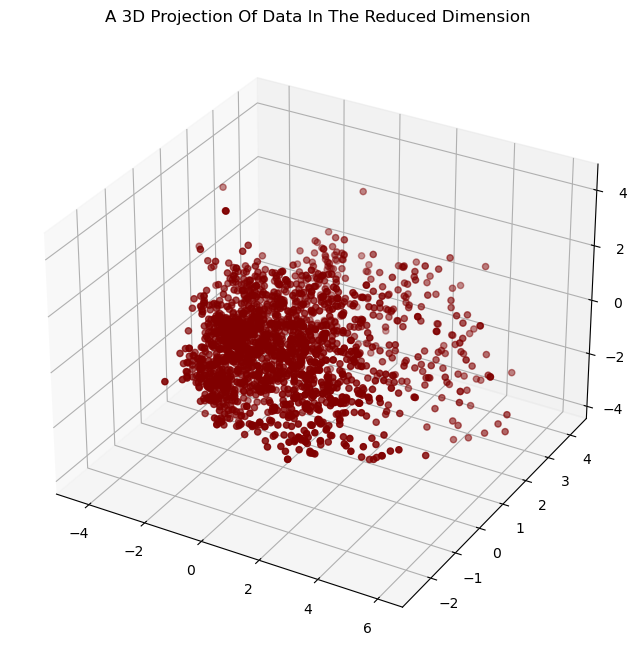

In [50]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df2["col1"]
y =PCA_df2["col2"]
z =PCA_df2["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()


## Customer Analytics by STP : Segmentation, Targeting and Positioning

### 1-Segmentation: dividing a population into groups that share similar charachteristics.

### 2-Targeting: evaluating potential profits from segments and deciding which segment to focus on.

### 3-Positioning: what product would have the closest characteristics to customers' need.

# Clustering


## KMeans

In [51]:
PCA_df2

,col1,col2,col3
0,2.564305,2.369075,1.648344
1,-1.261734,-1.225216,-0.261706
2,1.732265,-0.747217,0.078536
3,-1.749624,-0.547499,-1.393751
4,0.145992,-1.390139,-0.486966
...,...,...,...
1953,-1.838587,-0.433842,0.339706
1954,0.260148,-1.153761,1.012125
1955,1.651085,-0.246066,-0.768434
1956,1.642749,-1.566120,-0.677120


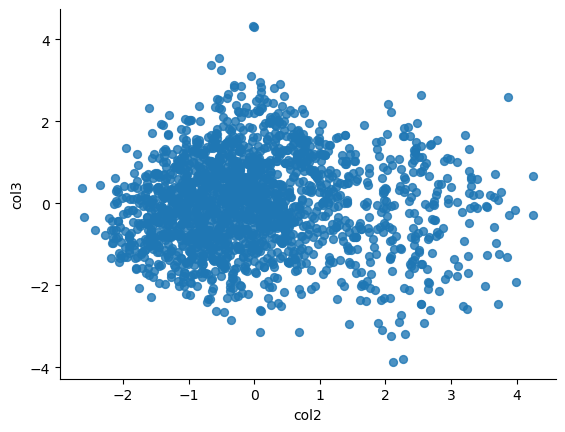

In [56]:
# @title col2 vs col3
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
PCA_df2.plot(kind='scatter', x='col2', y='col3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [57]:
km = KMeans() #by default it has form 8 clusters
y = km.fit_predict(PCA_df2)
y

array([4, 3, 1, ..., 1, 1, 5])

In [54]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df2)
Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


NameError: name 'KElbowVisualizer' is not defined

In [58]:
#we will select 5 clusters
km = KMeans(n_clusters=5)
y = km.fit_predict(PCA_df2)
y

array([4, 3, 2, ..., 2, 2, 0])

In [59]:
df1["Clusters"] = y

In [60]:
df1.columns

Index(['ID', 'Education', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain',
       'Response', 'age', 'Living_With', 'Years_Since_Registration',
       'Customer_Spent', 'Total_purcheses', 'Num_Children', 'Total_Accept_cmp',
       'Clusters'],
      dtype='object')

In [61]:
df1["Clusters"].value_counts() #data point every  are distributed equallty in clusters

3    762
1    431
2    335
0    272
4    158
Name: Clusters, dtype: int64

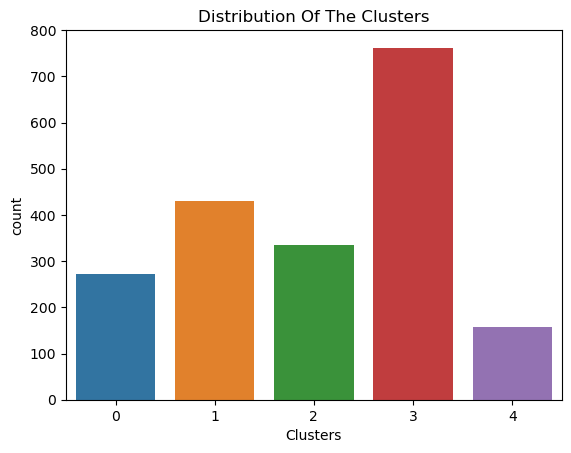

In [62]:
#Plotting countplot of clusters
sns.countplot(x=df1["Clusters"])
plt.title("Distribution Of The Clusters")
plt.show()

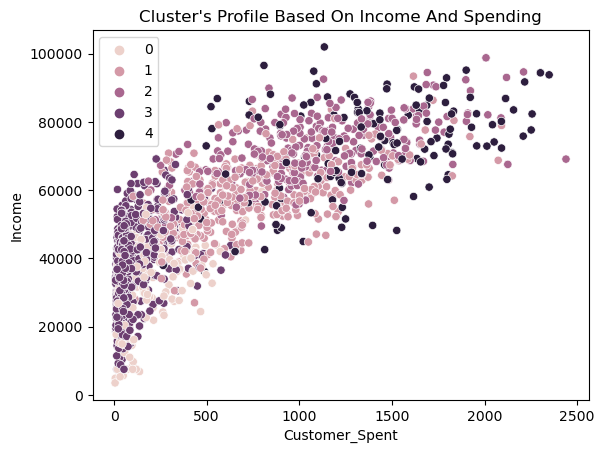

In [63]:
pl = sns.scatterplot(data = df1,x=df1["Customer_Spent"], y=df1["Income"],hue=df1["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()


cluster 0 high income low spend.

cluster 1 highest spent and highest earning.

cluster 2 low income low spend.

cluster 3 high income high spending.

cluster 4 lowest spent low income.

# Model Building

## There Are 3 Types of models

### 1.Overfitted --> If training accuracy is very high and testing accuracy is very low (more than 3% of difference) it is overfitted model

### 2.Underfitted -->model is not able to perform good in training as well as testing it is an underfitted model

### 3.Generalized -->both training accuracy and testing accuracy is high (less than 3 difference between training and testing accuracy)

In [64]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

In [65]:
df1

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp,Clusters
0,5524,0,58138.0,58,7,0,1,67,0,12,1617,25,0,0,4
1,2174,0,46344.0,38,5,0,0,70,0,10,27,6,2,0,3
2,4141,0,71613.0,26,4,0,0,59,1,11,776,21,0,0,2
3,6182,0,26646.0,26,6,0,0,40,1,10,53,8,1,0,3
4,5324,1,58293.0,94,5,0,0,43,1,10,422,19,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,0,34421.0,81,7,0,0,50,1,11,30,4,1,0,3
2236,4001,1,64014.0,56,7,0,0,78,1,10,444,22,3,1,1
2237,7270,0,56981.0,91,6,0,0,43,0,10,1241,19,0,1,2
2238,8235,1,69245.0,8,3,0,0,68,1,10,843,23,1,0,2


In [66]:
x = df1.iloc[:,:-1]
y = df1["Clusters"]


# Decision tree

In [67]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.80,random_state=42)

In [68]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred
print("train accuracy : ",dt.score(xtrain,ytrain))
print("test accuracy : ",dt.score(xtest,ytest))

train accuracy :  1.0
test accuracy :  0.8328015315890236


In [69]:
from sklearn import tree
tree.plot_tree(dt, feature_names=x.columns,max_depth=1,filled=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['ID', 'Education', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain',
       'Response', 'age', 'Living_With', 'Years_Since_Registration',
       'Customer_Spent', 'Total_purcheses', 'Num_Children',
       'Total_Accept_cmp'],
      dtype='object') instead.

Customer_spent is our root node highest infomation gain value this column is most important for model building

### We are getteing overfitted result as there is large difference between training accuracy and testing accuracy

# Decision Tree Using KFold(model validation technique)

In [72]:
kf = KFold(n_splits=5)
kf_scores = cross_val_score(DecisionTreeClassifier(),x,y,cv=kf)

In [73]:
kf_scores

array([0.88010204, 0.85969388, 0.84183673, 0.89514066, 0.85933504])

In [74]:
kf_scores.mean()

0.8672216712772066

In [75]:
tree.plot_tree(dt, feature_names=x.columns,max_depth=1,filled=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['ID', 'Education', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain',
       'Response', 'age', 'Living_With', 'Years_Since_Registration',
       'Customer_Spent', 'Total_purcheses', 'Num_Children',
       'Total_Accept_cmp'],
      dtype='object') instead.

Overfitted model as there is large difference between training accuracy and testing accuracy

In [76]:
def prediction(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(f"Test Accuracy: {model.score(xtest,ytest)}")
    print(classification_report(ytest,ypred))

# Logestic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
prediction(LogisticRegression()) #underfitted model as training accuracy and testing accuracy is very low

Train Accuracy: 0.5805626598465473
Test Accuracy: 0.5775366943203574
              precision    recall  f1-score   support

           0       0.58      0.10      0.17       228
           1       0.48      0.41      0.44       343
           2       0.38      0.47      0.42       255
           3       0.72      0.91      0.81       625
           4       0.38      0.43      0.40       116

    accuracy                           0.58      1567
   macro avg       0.51      0.47      0.45      1567
weighted avg       0.57      0.58      0.54      1567



# KNeighborsClassifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
prediction(KNeighborsClassifier()) #underfitted model as training accuracy and testing accuracy is very low

Train Accuracy: 0.6470588235294118
Test Accuracy: 0.547543075941289
              precision    recall  f1-score   support

           0       0.27      0.14      0.18       228
           1       0.49      0.59      0.53       343
           2       0.56      0.54      0.55       255
           3       0.64      0.74      0.68       625
           4       0.41      0.24      0.30       116

    accuracy                           0.55      1567
   macro avg       0.47      0.45      0.45      1567
weighted avg       0.52      0.55      0.53      1567



In [80]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, VotingClassifier

In [81]:
bg_dt = BaggingClassifier(KNeighborsClassifier())
bg_dt.fit(xtrain,ytrain)
print(f"Train accuracy : {bg_dt.score(xtrain,ytrain)}\nTest accuracy : {bg_dt.score(xtest,ytest)}") #underfitted model as training accuracy and testing accuracy is very low

Train accuracy : 0.6854219948849105
Test accuracy : 0.5488194001276324


# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, classification_report

In [83]:
prediction(RandomForestClassifier(max_depth=4)) #generalized model  good model

Train Accuracy: 0.9258312020460358
Test Accuracy: 0.8583280153158902
              precision    recall  f1-score   support

           0       0.99      0.61      0.76       228
           1       0.75      0.88      0.81       343
           2       0.91      0.87      0.89       255
           3       0.86      0.95      0.90       625
           4       0.96      0.78      0.86       116

    accuracy                           0.86      1567
   macro avg       0.89      0.82      0.84      1567
weighted avg       0.87      0.86      0.86      1567



# SVM

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [85]:
prediction(SVC()) #underfitted model as training acccuracy and testing accuracy is very low

Train Accuracy: 0.6010230179028133
Test Accuracy: 0.5922144224633057
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.52      0.58      0.55       343
           2       0.56      0.71      0.63       255
           3       0.63      0.88      0.74       625
           4       0.00      0.00      0.00       116

    accuracy                           0.59      1567
   macro avg       0.34      0.43      0.38      1567
weighted avg       0.46      0.59      0.52      1567



# Random forest is a best performing algorithm


# Final model

In [86]:
rf = RandomForestClassifier(max_depth=4)
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
ypred
print(f"training accuracy : {rf.score(xtrain,ytrain)}\ntesting accuracy :{rf.score(xtest,ytest)}")
print(classification_report(ytest,ypred))

#Generalized model

training accuracy : 0.9207161125319693
testing accuracy :0.8627951499680919
              precision    recall  f1-score   support

           0       0.98      0.64      0.77       228
           1       0.78      0.87      0.82       343
           2       0.91      0.87      0.89       255
           3       0.86      0.95      0.90       625
           4       0.93      0.83      0.88       116

    accuracy                           0.86      1567
   macro avg       0.89      0.83      0.85      1567
weighted avg       0.87      0.86      0.86      1567



In [87]:
df1

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp,Clusters
0,5524,0,58138.0,58,7,0,1,67,0,12,1617,25,0,0,4
1,2174,0,46344.0,38,5,0,0,70,0,10,27,6,2,0,3
2,4141,0,71613.0,26,4,0,0,59,1,11,776,21,0,0,2
3,6182,0,26646.0,26,6,0,0,40,1,10,53,8,1,0,3
4,5324,1,58293.0,94,5,0,0,43,1,10,422,19,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,0,34421.0,81,7,0,0,50,1,11,30,4,1,0,3
2236,4001,1,64014.0,56,7,0,0,78,1,10,444,22,3,1,1
2237,7270,0,56981.0,91,6,0,0,43,0,10,1241,19,0,1,2
2238,8235,1,69245.0,8,3,0,0,68,1,10,843,23,1,0,2


# Hierarchical clustering

In [80]:
from sklearn.cluster import AgglomerativeClustering
acs = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
Y = acs.fit_predict(df1)
Y.shape

(1958,)

In [81]:
#converted the cluster labels (Y) to a DataFrame Y_new and then used value_counts() to get the count of each unique cluster labe
Y_new = pd.DataFrame(Y)
Y_new[0].value_counts()

0    1954
3       1
2       1
4       1
1       1
Name: 0, dtype: int64

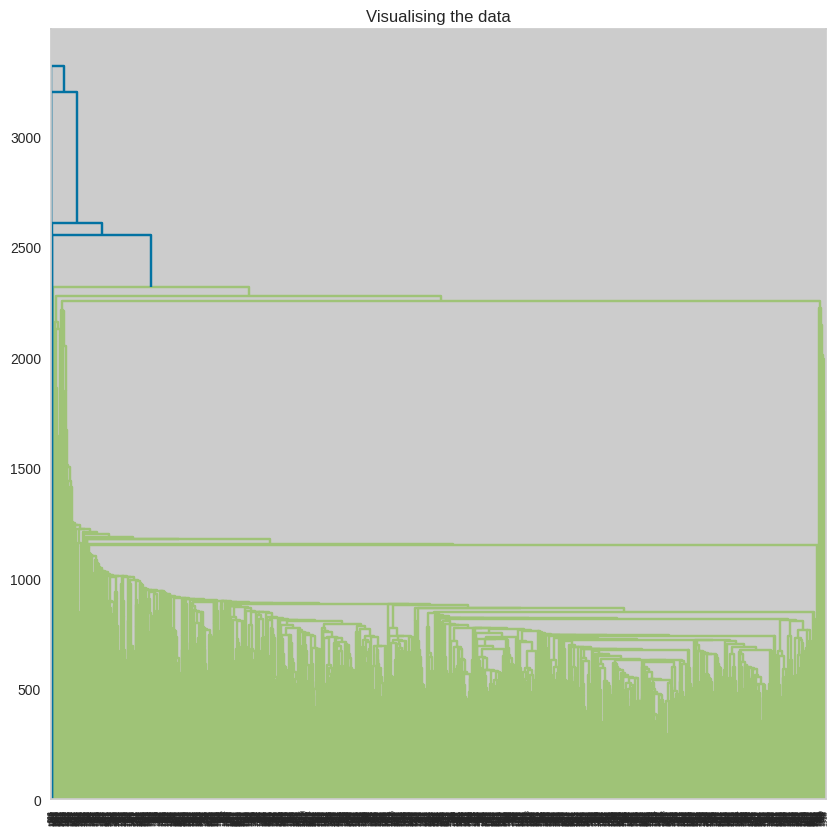

In [82]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score




plt.figure(figsize =(10, 10))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df1, method ='single')))

In [83]:
silhouette_score(df1,Y)

0.1941030433198822

In [84]:
#AgglomerativeClustering with different configuration, specifying five clusters (n_clusters=5), using Euclidean distance as the affinity metric (affinity='euclidean'), and complete linkage as the linkage criterion



In [85]:
acc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
Y2 = acc.fit_predict(df1)
Y2

array([3, 3, 0, ..., 3, 0, 3])

In [86]:
#created a DataFrame Y2_new to store the cluster labels (Y2) and then used value_counts() to get the count of each unique cluster label.
Y2_new = pd.DataFrame(Y2,columns=['clusters'])
Y2_new.value_counts()

clusters
1           723
0           538
3           468
2           201
4            28
dtype: int64

In [87]:
#concatenated the original DataFrame df1 with the cluster labels from Y2_new, creating a new DataFrame df1_new
df1_new = pd.concat([df1,Y2_new],axis=1)
df1_new

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp,Clusters,clusters
0,5524.0,0.0,58138.0,58.0,7.0,0.0,1.0,67.0,0.0,12.0,1617.0,25.0,0.0,0.0,4.0,3.0
1,2174.0,0.0,46344.0,38.0,5.0,0.0,0.0,70.0,0.0,10.0,27.0,6.0,2.0,0.0,0.0,3.0
2,4141.0,0.0,71613.0,26.0,4.0,0.0,0.0,59.0,1.0,11.0,776.0,21.0,0.0,0.0,1.0,0.0
3,6182.0,0.0,26646.0,26.0,6.0,0.0,0.0,40.0,1.0,10.0,53.0,8.0,1.0,0.0,0.0,1.0
4,5324.0,1.0,58293.0,94.0,5.0,0.0,0.0,43.0,1.0,10.0,422.0,19.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


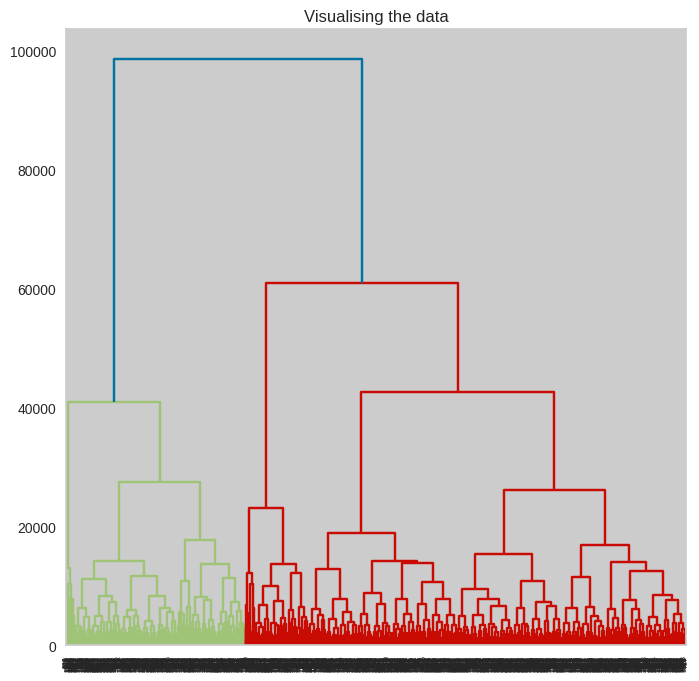

In [88]:
#visualizing a dendrogram for hierarchical clustering using the complete linkage method
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df1, method ='complete')))

In [89]:
silhouette_score(df1,Y2)

0.3770974171714155

In [90]:
#avarage linkage
aca = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
Y3 = aca.fit_predict(df1)
Y3

array([2, 1, 2, ..., 2, 2, 1])

In [91]:
#created a DataFrame Y3_new to store the cluster labels (Y3) and then used value_counts() to get the count of each unique cluster label.
Y3_new = pd.DataFrame(Y3,columns=['clusters'])
Y3_new.value_counts()

clusters
1           750
2           625
0           348
3           233
4             2
dtype: int64

In [92]:
#concatenated the original DataFrame df1 with the cluster labels from Y3_new, creating a new DataFrame df1_new
df1_new = pd.concat([df1,Y3_new],axis=1)
df1_new

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp,Clusters,clusters
0,5524.0,0.0,58138.0,58.0,7.0,0.0,1.0,67.0,0.0,12.0,1617.0,25.0,0.0,0.0,4.0,2.0
1,2174.0,0.0,46344.0,38.0,5.0,0.0,0.0,70.0,0.0,10.0,27.0,6.0,2.0,0.0,0.0,1.0
2,4141.0,0.0,71613.0,26.0,4.0,0.0,0.0,59.0,1.0,11.0,776.0,21.0,0.0,0.0,1.0,2.0
3,6182.0,0.0,26646.0,26.0,6.0,0.0,0.0,40.0,1.0,10.0,53.0,8.0,1.0,0.0,0.0,0.0
4,5324.0,1.0,58293.0,94.0,5.0,0.0,0.0,43.0,1.0,10.0,422.0,19.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


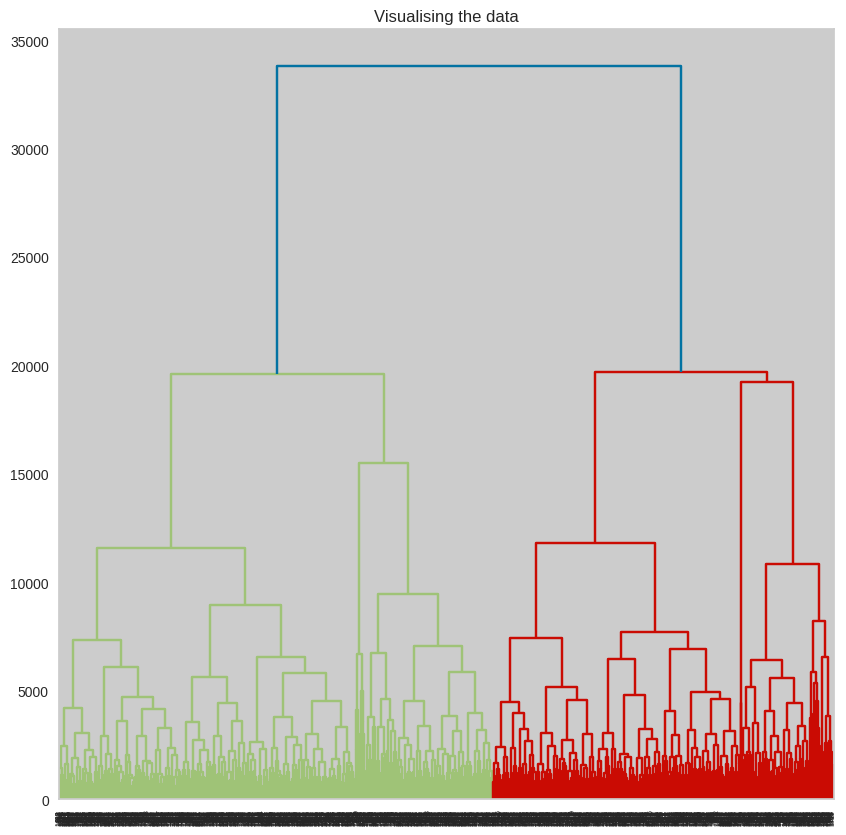

In [93]:
#visualizing a dendrogram for hierarchical clustering using the complete linkage method
plt.figure(figsize =(10, 10))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df1, method ='average')))

In [94]:
silhouette_score(df1,Y3)

0.43389866912846903

In [95]:
#AgglomerativeClustering with different configuration, specifying five clusters (n_clusters=5), using Euclidean distance as the affinity metric (affinity='euclidean'), and complete linkage as the linkage criterion

acw = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
Y4 = acw.fit_predict(df1)
Y4

array([0, 4, 0, ..., 0, 0, 4])

In [96]:
#created a DataFrame Y4_new to store the cluster labels (Y4) and then used value_counts() to get the count of each unique cluster label.
Y4_new = pd.DataFrame(Y4,columns=['clusters'])
Y4_new.value_counts()

clusters
0           581
1           445
4           384
2           363
3           185
dtype: int64

In [97]:
#concatenated the original DataFrame df1 with the cluster labels from Y4_new, creating a new DataFrame df1_new
df1_new = pd.concat([df1,Y4_new],axis=1)
df1_new

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp,Clusters,clusters
0,5524.0,0.0,58138.0,58.0,7.0,0.0,1.0,67.0,0.0,12.0,1617.0,25.0,0.0,0.0,4.0,0.0
1,2174.0,0.0,46344.0,38.0,5.0,0.0,0.0,70.0,0.0,10.0,27.0,6.0,2.0,0.0,0.0,4.0
2,4141.0,0.0,71613.0,26.0,4.0,0.0,0.0,59.0,1.0,11.0,776.0,21.0,0.0,0.0,1.0,0.0
3,6182.0,0.0,26646.0,26.0,6.0,0.0,0.0,40.0,1.0,10.0,53.0,8.0,1.0,0.0,0.0,2.0
4,5324.0,1.0,58293.0,94.0,5.0,0.0,0.0,43.0,1.0,10.0,422.0,19.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


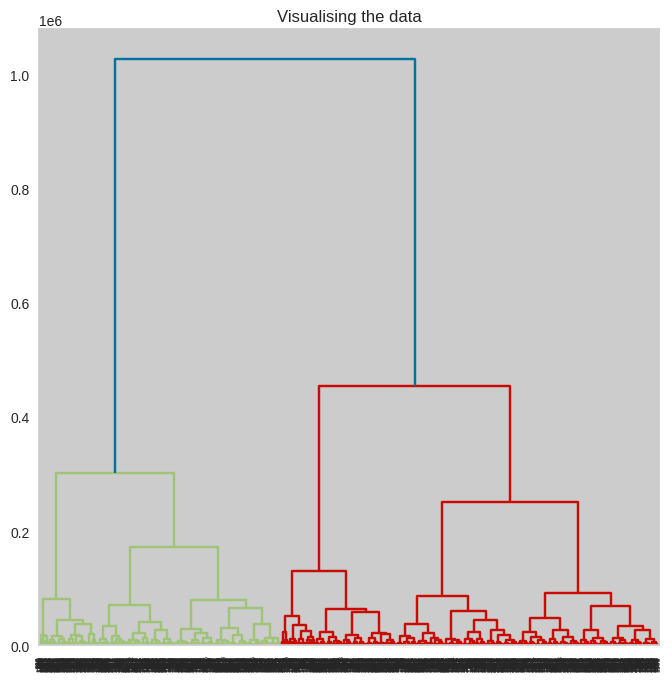

In [98]:
#visualizing a dendrogram for hierarchical clustering using the complete linkage method
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df1, method ='ward')))

In [99]:
silhouette_score(df1,Y4)

0.3935072743476695

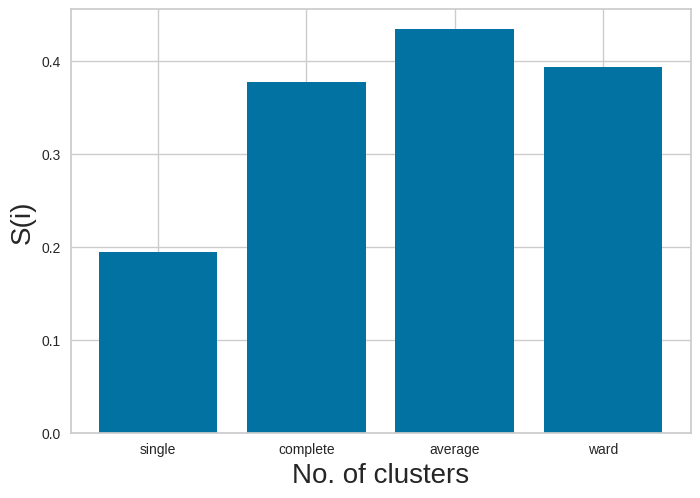

In [100]:
k = ['single','complete','average','ward']
silhouette_scores = []
silhouette_scores.append(silhouette_score(df1,Y))
silhouette_scores.append(silhouette_score(df1,Y2))
silhouette_scores.append(silhouette_score(df1,Y3))
silhouette_scores.append(silhouette_score(df1,Y4))

plt.bar(k,silhouette_scores)
plt.xlabel('No. of clusters',fontsize=20)
plt.ylabel('S(i)',fontsize=20)
plt.show()

# A clustering with an average silhoute width of over 0.7 is considered to be "strong" but form the about graph silhoute score is less than 0.7 . so,This model is not suitable

**DBSCAN** **MODEL**

In [101]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_df1 = ss.fit_transform(df1)
ss_df1 = pd.DataFrame(ss_df1)
ss_df1.columns = list(df1)
ss_df1

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp,Clusters
0,-0.023233,-0.915935,0.460740,0.305617,0.649124,-0.101587,2.549885,1.030059,-1.364761,1.529466,2.054732,1.464614,-1.384884,-0.414517,1.813031
1,-1.055082,-0.915935,-0.138591,-0.384856,-0.234732,-0.101587,-0.392174,1.288254,-1.364761,-1.405070,-0.893799,-1.078517,1.358265,-0.414517,-1.045193
2,-0.449217,-0.915935,1.145493,-0.799140,-0.676659,-0.101587,-0.392174,0.341536,0.732729,0.062198,0.495163,0.929218,-1.384884,-0.414517,-0.330637
3,0.179440,-0.915935,-1.139575,-0.799140,0.207196,-0.101587,-0.392174,-1.293705,0.732729,-1.405070,-0.845584,-0.810819,-0.013309,-0.414517,-1.045193
4,-0.084836,0.552861,0.468616,1.548469,-0.234732,-0.101587,-0.392174,-1.035509,0.732729,-1.405070,-0.161303,0.661520,-0.013309,-0.414517,-1.045193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,0.853992,-0.915935,-0.744476,1.099662,0.649124,-0.101587,-0.392174,-0.433052,0.732729,0.062198,-0.888236,-1.346215,-0.013309,-0.414517,-1.045193
1954,-0.492339,0.552861,0.759338,0.236570,0.649124,-0.101587,-0.392174,1.976777,0.732729,-1.405070,-0.120505,1.063067,2.729840,1.228447,1.098475
1955,0.514560,-0.915935,0.401945,1.444898,0.207196,-0.101587,-0.392174,-1.035509,-1.364761,-1.405070,1.357469,0.661520,-1.384884,1.228447,-0.330637
1956,0.811794,0.552861,1.025159,-1.420566,-1.118587,-0.101587,-0.392174,1.116124,0.732729,-1.405070,0.619409,1.196916,-0.013309,-0.414517,-0.330637


In [102]:
#applied (DBSCAN) to standardized data (ss_df1)

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2,min_samples=5)
dbscan.fit(ss_df1)

DBSCAN(eps=2)

In [103]:
#created a DataFrame Y_new to store the cluster labels Y , and then you used value_counts() to count the occurrences of each unique cluster label
Y_new = pd.DataFrame(Y,columns=['clusters'])
Y_new.value_counts(sort=True)

clusters
0           1954
1              1
2              1
3              1
4              1
dtype: int64

In [104]:
#calculating the silhouette score for the clusters
from sklearn.metrics import silhouette_score
silhouette_score(ss_df1,Y)

0.025662849051876456

In [105]:
#concatenated the original feature matrix df1 with the cluster labels from Y_new, creating a new DataFrame df1_new
df1_new = pd.concat([df1,Y_new],axis=1)
df1_new

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp,Clusters,clusters
0,5524.0,0.0,58138.0,58.0,7.0,0.0,1.0,67.0,0.0,12.0,1617.0,25.0,0.0,0.0,4.0,0.0
1,2174.0,0.0,46344.0,38.0,5.0,0.0,0.0,70.0,0.0,10.0,27.0,6.0,2.0,0.0,0.0,0.0
2,4141.0,0.0,71613.0,26.0,4.0,0.0,0.0,59.0,1.0,11.0,776.0,21.0,0.0,0.0,1.0,0.0
3,6182.0,0.0,26646.0,26.0,6.0,0.0,0.0,40.0,1.0,10.0,53.0,8.0,1.0,0.0,0.0,0.0
4,5324.0,1.0,58293.0,94.0,5.0,0.0,0.0,43.0,1.0,10.0,422.0,19.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [106]:
# applied the DBSCAN algorithm again with different parameters to your standardized data then created a new set of cluster labels Y2 and a DataFrame Y2_new to store these labels.


In [114]:
dbscan = DBSCAN(eps=1,min_samples=5)
dbscan.fit(ss_df1)
Y = dbscan.labels_
Y_new = pd.DataFrame(Y,columns=['clusters'])
Y_new.value_counts()
silhouette_score(ss_df1,Y)

-0.2215199105807876

In [107]:
dbscan = DBSCAN(eps=3,min_samples=5)
dbscan.fit(ss_df1)
Y2 = dbscan.labels_
Y2_new = pd.DataFrame(Y2,columns=['clusters'])
Y2_new.value_counts()
silhouette_score(ss_df1,Y2)

0.3959494971962206

In [108]:
dbscan = DBSCAN(eps=4,min_samples=5)
dbscan.fit(ss_df1)
Y3 = dbscan.labels_
Y3_new = pd.DataFrame(Y3,columns=['clusters'])
Y3_new.value_counts()
silhouette_score(ss_df1,Y3)

0.4820032573276912

In [109]:
dbscan = DBSCAN(eps=5,min_samples=5)
dbscan.fit(ss_df1)
Y4 = dbscan.labels_
Y4_new = pd.DataFrame(Y4,columns=['clusters'])
Y4_new.value_counts()
silhouette_score(ss_df1,Y4)

0.5092125361414938

In [110]:
df_new = pd.concat([df1,Y4_new],axis=1)
df_new

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp,Clusters,clusters
0,5524.0,0.0,58138.0,58.0,7.0,0.0,1.0,67.0,0.0,12.0,1617.0,25.0,0.0,0.0,4.0,0.0
1,2174.0,0.0,46344.0,38.0,5.0,0.0,0.0,70.0,0.0,10.0,27.0,6.0,2.0,0.0,0.0,0.0
2,4141.0,0.0,71613.0,26.0,4.0,0.0,0.0,59.0,1.0,11.0,776.0,21.0,0.0,0.0,1.0,0.0
3,6182.0,0.0,26646.0,26.0,6.0,0.0,0.0,40.0,1.0,10.0,53.0,8.0,1.0,0.0,0.0,0.0
4,5324.0,1.0,58293.0,94.0,5.0,0.0,0.0,43.0,1.0,10.0,422.0,19.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [112]:
dbscan = DBSCAN(eps=2,min_samples=5)
dbscan.fit(ss_df1)
Y5 = dbscan.labels_
Y5_new = pd.DataFrame(Y3,columns=['clusters'])
Y5_new.value_counts()
silhouette_score(ss_df1,Y5)

-0.11057499267645711

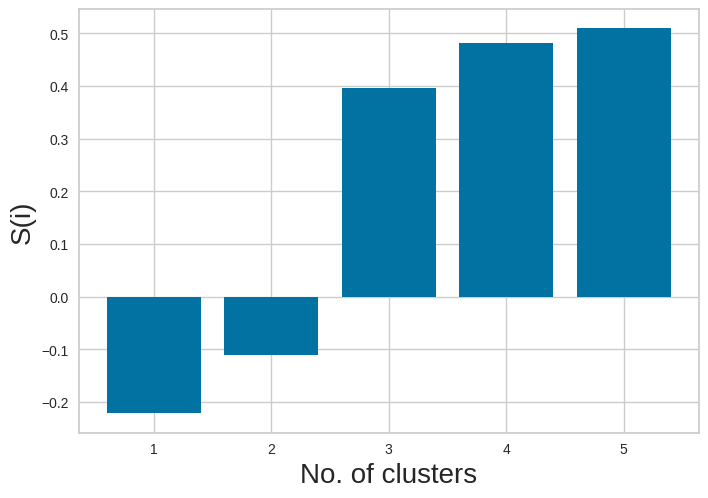

In [115]:
D = [1,3,4,5,2,]
silhouette_scores = []
silhouette_scores.append(silhouette_score(ss_df1,Y))
silhouette_scores.append(silhouette_score(ss_df1,Y2))
silhouette_scores.append(silhouette_score(ss_df1,Y3))
silhouette_scores.append(silhouette_score(ss_df1,Y4))
silhouette_scores.append(silhouette_score(ss_df1,Y5))

plt.bar(D,silhouette_scores)
plt.xlabel('No. of clusters',fontsize=20)
plt.ylabel('S(i)',fontsize=20)
plt.show()

silhouette score is less than 0.7. so this DBSCAN model is not suitable

In [90]:
from pickle import dump

In [91]:
dump(rf, open('clsf.pkl','wb'))